<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" style="background: linear-gradient(to right, #ff0000, #ffa07a); color: white;" data-toggle="list" role="tab" aria-controls="home">Data Science Project: Defects Data Analysis in Yorkmars Factory</h3>

Name: D.K.D.L. Lakmal

Index No: 229415U

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" style="background: linear-gradient(to right, #00008b, #87ceeb); color: white; text-align: center; padding: 0.25em 0;" data-toggle="list" role="tab" aria-controls="home">Aim of this project</h3>
</div>

<div style="background-color: #f7f7f7; padding: 0.25em;">
  <p style="text-align: justify; font-size: 1.2em;">The aim of this project is to build in detail a Defects data analysis of the last 6 months of my organization and to develop useful insights that can be used to identify major issues that should be addressed by the Quality Control department.</p>
</div>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" style="background: linear-gradient(to right, #00008b, #87ceeb); color: white; text-align: center; padding: 0.25em 0;" data-toggle="list" role="tab" aria-controls="home">Dataset Description</h3>
</div>

<div style="background-color: #f7f7f7; padding: 0.25em;">
  <p style="text-align: justify; font-size: 1.2em;">This dataset contains the Quality data of the Sewing department of my organization, Yorkmars (Cambodia) Garment MFG Co. (YM), which is one of the largest Garment Factories in Cambodia and located in the capital city of Phnom Penh. They export their sewing items to the European Countries such as Canada (Their Main Buyer), USA and few of other Europe countries. The dataset includes 3 CSV files that contain the first quality check at the end of production on a daily basis during the last 6 months, starting from August 2022. The data was collected as CSV files and is described in detail in the following table.</p>
</div>

**This analysis useful for Quality department – Managers, Supervisors, Line leaders, QC and QA workers, General Managers and Factory managers** to make decisions regarding improving and maintaining the Quality and Standard of the sewing production.

In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# 1. Data Preprocessing

<a id="1.1"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.1 Reading Data</div>

Datasets include follwing 3 csv files;

    1. Task 38.csv - Inside checking of the Garments by QC1 Employee
    2. Task 39.csv - Outside checking of the Garments by QC1 Employee
    3. Defects Data - All the sewing defects Data

In [2]:
# Reading all the csv files
path = 'D:/229415U - DS Project/Datasets/'

inside_checking = pd.read_csv(path + 'Task 38.csv')
outside_checking = pd.read_csv(path + 'Task 39.csv')
defects_data = pd.read_csv(path + 'Defects Data.csv')

Let's see first 5 rows of Inside checking

In [3]:
inside_checking.head()

,Date,QC1 ID,QC1 Worker Name,Work House,Work shop,Sewing Line No,Style No,Buyer Name,Checked QTY,Total SAM,Working Mins
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3147683,2564196.96,1955021.28
1,8/1/2022,YM4781,Pos Sothavy,YM,1.0,6.0,PTCOC313,C&O APPAREL INC.,134,120.60,316.43
2,8/1/2022,YM4781,Pos Sothavy,YM,1.0,7.0,PTCOA229,C&O APPAREL INC.,35,31.50,23.07
3,8/1/2022,YM4718,Koeuy Net,YM,3.0,22.0,PTAR9029,ARITZIA LP,535,10.70,391.69
4,8/1/2022,YM6576,Long Sreyleak,YM,1.0,7.0,PTCOA229,C&O APPAREL INC.,687,618.30,360.37


Let's see first 5 rows of Outside checking

In [4]:
outside_checking.head()

,QC1 ID,QC1 Worker Name,Date,Work House,Work shop,Sewing Line No,Style No,Buyer Name,Checked QTY,Total SAM,Working Mins
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3179142,3309835.56,1850656.18
1,YM2757,Hor Tha,8/1/2022,YM,2.0,18.0,PTAF0023,ABERCROMBIE & FITCH,92,110.40,29.87
2,YM2757,Hor Tha,8/1/2022,YM,2.0,12.0,PTCOC312,C&O APPAREL INC.,614,736.80,294.08
3,YM4163,Dy Sievorn,8/1/2022,YM,2.0,10.0,PTRT1616,REITMANS (CANADA) LIMITED,667,13.34,430.53
4,6004,6004,8/1/2022,Elite,6.0,103.0,PTAR9047,ARITZIA LP,394,472.80,16.72


It is clear that both Task 38 and Task 39 have the same columns, as they contain details about the same garment, both inside and outside. However, there are two QC workers for checking the inside and outside of the garment. As a result, the "Checked QTY," "Total SAM," and "Working Mins" values differ between the two tables. Nonetheless, for any particular "Sewing Line No," all other details are equal.

Let's see first 5 rows in defects data

In [5]:
defects_data.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Defect Code,Defect Name,Defects QTY
0,8/1/2022,YM6241,Mao Chanthy,9.0,PTAF0018,3.0,Twisted,2
1,8/1/2022,YM4736,Tun Sreyrath,9.0,PTAF0018,1.0,Uneven/ Asymmetry,1
2,8/1/2022,YM4799,Hum Channy,9.0,PTAF0018,2.0,Non-defective,1
3,8/1/2022,YM4178,Maeuk Chetna,16.0,PTAF0022,1.0,Uneven/ Asymmetry,2
4,8/1/2022,YM6371,Rym Sreynet,16.0,PTAF0022,11.0,Dirty stain,1


Before creating a complete dataset with all necessary information, it's helpful to investigate the size of each individual datasets. This will give the initial understanding and help to make more informed decisions about how to join the datasets effectively.

In [6]:
# Collections for each dataset
datasets = [inside_checking, outside_checking, defects_data] # list of 3 Pandas DataFrames
names = ['inside_checking', 'outside_checking', 'defects_data'] # names of the 3 datasets as strings

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({}) # create an empty DataFrame

# Add information about each dataset to the DataFrame

# add the names of each dataset as a column
data_info['dataset name'] = names 

# add the number of rows for each dataset as a column
data_info['total_rows'] = [df.shape[0] for df in datasets] 

# add the number of columns for each dataset as a column
data_info['total_columns'] = [df.shape[1] for df in datasets] 

# add the total number of missing values for each dataset as a column
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets] 

# add the number of columns with missing values for each dataset as a column
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets] 

# add a string with the names of columns with missing values for each dataset as a column
# Style the DataFrame for better readability

data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets] 

data_info.style.background_gradient() # apply a gradient background to the DataFrame

,dataset name,total_rows,total_columns,null_amount,qty_null_columns,null_columns_names
0,inside_checking,6962,11,8,8,"Date, QC1 ID, QC1 Worker Name, Work House, Work shop, Sewing Line No, Style No, Buyer Name"
1,outside_checking,7015,11,8,8,"QC1 ID, QC1 Worker Name, Date, Work House, Work shop, Sewing Line No, Style No, Buyer Name"
2,defects_data,81722,8,677,3,"Sewing Line No, Defect Code, Defect Name"


The number of rows in each of the inside checking and outside checking datasets are close, but the defect data dataset is much larger because it uses one row for each defect record, as previously shown. Additionally, Above output shows that there is a large number of missing values in the defects dataset.

Let's see in detailed overview of all attributes in each datasets

In [7]:
# Set display options for Pandas
pd.set_option('display.max_rows', None)  # set maximum number of rows to display, or None to display all rows
pd.set_option('display.max_columns', None)  # set maximum number of columns to display, or None to display all columns
pd.set_option('display.expand_frame_repr', False)  # set whether to wrap the DataFrame representation or not

# Define a function to get an overview of the data in a Pandas DataFrame
def data_overview(df):
    """
    Get an overview of the data in a Pandas DataFrame.
    
    Parameters:
    df (Pandas DataFrame): The DataFrame to get an overview of.
    
    Returns:
    overview (Pandas DataFrame): A DataFrame containing information about the columns in the input DataFrame.
    """
    # create an empty DataFrame
    overview = pd.DataFrame() 
    
    # add the column names as a column
    overview['Attribute'] = df.columns 
    
    # add the number of missing values for each column as a column
    overview['total_null_QTY'] = df.isnull().sum().values
    
    # add the percentage of missing values for each column as a column
    overview['Null_Percentage'] = (df.isnull().sum() / df.shape[0] * 100).values 
    
    # add the data type for each column as a column
    overview['Data_Type'] = df.dtypes.values 
    
    # add the number of unique values for each categorical column as a column
    overview['Total_Categorical_Amount'] = [len(df[col].unique()) if df[col].dtype == 'object' else '-' for col in df.columns]
    
    return overview

# Create a DataFrame to store the overview of all datasets
df_overview = pd.DataFrame({}) # create an empty DataFrame
name_col = [] # create an empty list to store the names of the datasets

# Get an overview of each dataset and add it to the df_overview DataFrame
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1] # add the name of each dataset to the name_col list
    df_overview = df_overview.append(data_overview(df)) # add the overview of each dataset to the df_overview DataFrame

# Add the dataset name as a column to the df_overview DataFrame
df_overview['dataset name'] = name_col 

# Reorder the columns in the df_overview DataFrame
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]


C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3356197905.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3356197905.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3356197905.py:44: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [8]:
# Create an empty DataFrame to store the overview of all datasets
df_overview = pd.DataFrame({})
name_col = [] # create an empty list to store the names of the datasets

# Loop through each dataset, get its overview, and add it to the df_overview DataFrame
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1] # add the name of each dataset to the name_col list
    df_overview = df_overview.append(data_overview(df)) # add the overview of each dataset to the df_overview DataFrame

# Add the dataset name as a column to the df_overview DataFrame
df_overview['dataset name'] = name_col

# Reorder the columns in the df_overview DataFrame
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]

# Display the df_overview DataFrame
df_overview

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3599836118.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3599836118.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3599836118.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,dataset name,Attribute,total_null_QTY,Null_Percentage,Data_Type,Total_Categorical_Amount
0,inside_checking,Date,1,0.014364,object,153
1,inside_checking,QC1 ID,1,0.014364,object,87
2,inside_checking,QC1 Worker Name,1,0.014364,object,87
3,inside_checking,Work House,1,0.014364,object,3
4,inside_checking,Work shop,1,0.014364,float64,-
5,inside_checking,Sewing Line No,1,0.014364,float64,-
6,inside_checking,Style No,1,0.014364,object,433
7,inside_checking,Buyer Name,1,0.014364,object,10
8,inside_checking,Checked QTY,0,0.000000,int64,-
9,inside_checking,Total SAM,0,0.000000,float64,-


It seems that null values present in this data set.

**_Date, QC1 ID, QC1 Worker Name, Work House, Work Shop, Sewing Line No, Style No and Buyer Name columns in each Task 38 and Task 39 has 1 Null value._**
    
**_Defects Data, Sewing Line No, Style No, Defect code, Defect Name and Defects QTY columns has considerable amount of Null values._**

<a id="1.2"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.2 Data Cleaning</div>

<a id="1.2"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.2.1 Dealing with Null Values</div>

Let's first handle the missing values in Task 38 and Task 39. As seen in the previous output, there are 8 columns with missing values. Let's examine the location of these missing values and determine the cause.

In [9]:
# Get a Boolean mask indicating the missing values
mask = inside_checking.isnull().any(axis=1)

# Select the rows with missing values
missing_rows = inside_checking[mask]

# Display the rows with missing values
print(missing_rows)

  Date QC1 ID QC1 Worker Name Work House  Work shop  Sewing Line No Style No Buyer Name  Checked QTY   Total SAM  Working Mins
0  NaN    NaN             NaN        NaN        NaN             NaN      NaN        NaN      3147683  2564196.96    1955021.28


The reason for the missing values in the 8 columns in both Task 38 and Task 39 is that some rows represent the sum of values and can be easily removed from the datasets.

In [10]:
inside_checking = inside_checking.dropna()
outside_checking = outside_checking.dropna()

datasets = [inside_checking, outside_checking, defects_data]
names = ['inside_checking', 'outside_checking', 'defects_data']

df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(data_overview(df))

df_overview['dataset name'] = name_col
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]

df_overview

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3287714317.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3287714317.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3287714317.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,dataset name,Attribute,total_null_QTY,Null_Percentage,Data_Type,Total_Categorical_Amount
0,inside_checking,Date,0,0.000000,object,152
1,inside_checking,QC1 ID,0,0.000000,object,86
2,inside_checking,QC1 Worker Name,0,0.000000,object,86
3,inside_checking,Work House,0,0.000000,object,2
4,inside_checking,Work shop,0,0.000000,float64,-
5,inside_checking,Sewing Line No,0,0.000000,float64,-
6,inside_checking,Style No,0,0.000000,object,432
7,inside_checking,Buyer Name,0,0.000000,object,9
8,inside_checking,Checked QTY,0,0.000000,int64,-
9,inside_checking,Total SAM,0,0.000000,float64,-


Let's deal with the defect data - Null values. Here, Defect Name column, there are 585 rows with missing values. 

Therefore, first let's address this issue. One reason for missing defect names is that if a piece has multiple defects, the worker adds a tag to the piece but does not give it a name. This is because if a piece has more than one defect, the checked QTY may be lower than the total defect QTY, which is not possible.

In [11]:
defects_data[defects_data['Defect Name'].isnull()]

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Defect Code,Defect Name,Defects QTY
175,8/1/2022,YM4757,Voeurn Sokla,23.0,PTCOT051,0.0,NaN,1
1025,8/6/2022,YM5030,Eak Channy,20.0,HPRT0497,44.0,NaN,1
1129,8/6/2022,YM2707,Choeng Pang,23.0,PTCOC312,0.0,NaN,1
1247,8/1/2022,YM2825,Pheng Lina,8.0,PTAR8994,0.0,NaN,1
1399,8/9/2022,YM6072,Chhun En,4.0,PTAR9009,0.0,NaN,1
1559,8/8/2022,YM4718,Koeuy Net,22.0,PTAR9018,0.0,NaN,1
1582,8/10/2022,YM5288,Bo Bunchanny,3.0,PTAR8992,0.0,NaN,1
1652,8/10/2022,YM4757,Voeurn Sokla,23.0,PTCOC312,0.0,NaN,1
1883,8/4/2022,YM5030,Eak Channy,20.0,HPRT0497,0.0,NaN,1
2014,8/5/2022,YM2707,Choeng Pang,23.0,PTCOC312,0.0,NaN,1


In [12]:
defects_data['Defect Name'].isnull().sum()

516

Therefore, All the rows of defect Names which contain Null values can be removed from the defect data set. 

In [13]:
defects_data = defects_data[defects_data['Defect Name'].notnull()]

Let's see if it solve the issue of Null values in other columns in defect dataset

In [14]:
#Checking the Total number of Null values in 'Defect Name' column

print("Null values: ",defects_data['Defect Name'].isnull().sum())

Null values:  0


In [15]:
#Checking the Total number of Null values in Other columns

print("Null values in Sewing Line No : ",defects_data['Sewing Line No'].isnull().sum())
print("Null values in Style No : ",defects_data['Style No'].isnull().sum())
print("Null values in Defect Code: ",defects_data['Defect Code'].isnull().sum())
print("Null values in Defects QTY: ",defects_data['Defects QTY'].isnull().sum())

Null values in Sewing Line No :  21
Null values in Style No :  0
Null values in Defect Code:  0
Null values in Defects QTY:  0


It seems still there are 21 Null values present in the defects dataset. Let see what are those?

In [16]:
defects_data[defects_data['Sewing Line No'].isnull()]

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Defect Code,Defect Name,Defects QTY
468,8/2/2022,YM5801,Sao Nan,NaN,PTCOC313,4.0,Puckering/ Wavy/ Fullness,1
4604,8/22/2022,YM6371,Rym Sreynet,NaN,PTAR9015,11.0,Dirty stain,1
5553,8/4/2022,YM5295,Yav Sreyorn,NaN,PTCOC313,10.0,Wrong size/ label,2
19263,10/10/2022,YM6266,Chorn Mao,NaN,HPRT0571P,14.0,Untrimmed thread ends,1
22701,11/23/2022,YM4178,Maeuk Chetna,NaN,PTCOC317WC,2.0,Non-defective,1
29137,11/1/2022,YM4163,Dy Sievorn,NaN,PTRT1652C,29.0,Insecure,2
35646,12/19/2022,YM4026,Sann Navy,NaN,PTRT1708,5.0,Broken stitches,2
37713,12/19/2022,YM4026,Sann Navy,NaN,PTRT1708,13.0,Missed sewing,3
38318,12/21/2022,YM4178,Maeuk Chetna,NaN,PTCOC317WC,2.0,Non-defective,1
40389,12/10/2022,YM2825,Pheng Lina,NaN,GPAR09391,16.0,Pleated,5


Upon reviewing the top 21 rows, it is evident that all columns are not null except for Sewing Line No. There must be similar rows, similar to the 21 null rows, with the same Date, QC1 ID, QC1 Worker Name, and Style No, but with a value for Sewing Line No. This means that if I can find those similar rows, I can replace the null values in the above 21 rows with their Sewing Line No values.

In [17]:
# Find all rows with null values in the "Sewing Line No" column
null_rows = defects_data[defects_data["Sewing Line No"].isnull()]

# Loop through each null row
for i, null_row in null_rows.iterrows():
    # Get the values for "Date", "QC1ID", "QC1 Worker Name", and "Style No" for the current null row
    date = null_row["Date"]
    qc1id = null_row["QC1 ID"]
    qc1_worker_name = null_row["QC1 Worker Name"]
    style_no = null_row["Style No"]
    
    # Find all rows with the same values for "Date", "QC1ID", "QC1 Worker Name", and "Style No"
    matching_rows = defects_data[(defects_data["Date"] == date) & (defects_data["QC1 ID"] == qc1id) & (defects_data["QC1 Worker Name"] == qc1_worker_name) & (defects_data["Style No"] == style_no)]
    
    # Print only the first matching row
    print(matching_rows.iloc[0])

Date               8/2/2022
QC1 ID               YM5801
QC1 Worker Name     Sao Nan
Sewing Line No          6.0
Style No           PTCOC313
Defect Code            16.0
Defect Name         Pleated
Defects QTY               1
Name: 290, dtype: object
Date                   8/22/2022
QC1 ID                    YM6371
QC1 Worker Name      Rym Sreynet
Sewing Line No              13.0
Style No                PTAR9015
Defect Code                 13.0
Defect Name        Missed sewing
Defects QTY                    2
Name: 4446, dtype: object
Date                       8/4/2022
QC1 ID                       YM5295
QC1 Worker Name         Yav Sreyorn
Sewing Line No                 17.0
Style No                   PTCOC313
Defect Code                     6.0
Defect Name        Skipped stitches
Defects QTY                       4
Name: 740, dtype: object
Date                          10/10/2022
QC1 ID                            YM6266
QC1 Worker Name                Chorn Mao
Sewing Line No           

Let's replace Null values of the 1st simillar row - Sewing Line No

In [18]:
def replace_null_sewing_line_no(df):
    # Create a boolean mask to identify the rows with null values in the "Sewing Line No" column
    mask = df['Sewing Line No'].isnull()
    
    # Select only the rows with null values in the "Sewing Line No" column
    null_rows = df[mask]
    
    # Loop through each row with a null value in the "Sewing Line No" column
    for index, row in null_rows.iterrows():
        # Select only the rows that match the current row in the "Date", "QC1ID", "QC1 Worker Name", and "Style No" columns
        matching_rows = df[(df['Date'] == row['Date']) & (df['QC1 ID'] == row['QC1 ID']) & (df['QC1 Worker Name'] == row['QC1 Worker Name']) & (df['Style No'] == row['Style No'])]
        
        # If there are more than one matching row, use the first matching row to replace the null value in the "Sewing Line No" column
        if matching_rows.shape[0] > 1:
            df.at[index, 'Sewing Line No'] = matching_rows.iloc[0]['Sewing Line No']
            
    return df

defects_data = replace_null_sewing_line_no(defects_data)

In [19]:
defects_data[defects_data['Sewing Line No'].isnull()]

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Defect Code,Defect Name,Defects QTY
19263,10/10/2022,YM6266,Chorn Mao,NaN,HPRT0571P,14.0,Untrimmed thread ends,1
41282,1/21/2023,YM4781,Pos Sothavy,NaN,PTRT1733C-1,10.0,Wrong size/ label,1


Even After replacing with simillar value, there are two rows which have Null values in the Sewing Line No column. In this case, these two rows has to remove from this analysis since there is no way to detect the actual Sewing Line No. However, Based on my knowledge I know, Style No start with "HPRT" runs in the Sewing Line 19 or 20. And style No start with "HPRT" used for Bra Line which is not related to our factory, YM. Therefore, there is no affect of that. But for other Null row I can neglect becuase defect QTY is 1, which doesen't have affect for this analyis. 

In [20]:
defects_data = defects_data[defects_data['Sewing Line No'].notnull()]
defects_data['Sewing Line No'].isnull().sum()

0

Now defect dataset doesen't have any Null values, To make sure let's look at the all attributes again

In [21]:
datasets = [inside_checking, outside_checking, defects_data]
names = ['inside_checking', 'outside_checking', 'defects_data']

df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(data_overview(df))

df_overview['dataset name'] = name_col
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]

df_overview

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,dataset name,Attribute,total_null_QTY,Null_Percentage,Data_Type,Total_Categorical_Amount
0,inside_checking,Date,0,0.0,object,152
1,inside_checking,QC1 ID,0,0.0,object,86
2,inside_checking,QC1 Worker Name,0,0.0,object,86
3,inside_checking,Work House,0,0.0,object,2
4,inside_checking,Work shop,0,0.0,float64,-
5,inside_checking,Sewing Line No,0,0.0,float64,-
6,inside_checking,Style No,0,0.0,object,432
7,inside_checking,Buyer Name,0,0.0,object,9
8,inside_checking,Checked QTY,0,0.0,int64,-
9,inside_checking,Total SAM,0,0.0,float64,-


In [22]:
datasets = [inside_checking, outside_checking, defects_data]
names = ['inside_checking', 'outside_checking', 'defects_data']

data_info = pd.DataFrame({})

data_info['dataset name'] = names
data_info['total_rows'] = [df.shape[0] for df in datasets]
data_info['total_columns'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset name,total_rows,total_columns,null_amount,qty_null_columns,null_columns_names
0,inside_checking,6961,11,0,0,
1,outside_checking,7014,11,0,0,
2,defects_data,81204,8,0,0,


After working with Null values, No of Rows of Inside and Outside checking datasets are reduced by 1, and defect datasets it is reduced by 587.

<a id="1.2.2"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.2.2 Eliminating Defect Names Unrelated to QC1 Checking</div>

### Eliminating Defect Name end with '2'

In [23]:
#checking defect dataset - Defect Name column
unique_defect_names = defects_data['Defect Name'].unique()

for defect_name in unique_defect_names:
    print(defect_name)


Twisted
Uneven/ Asymmetry
Non-defective
Dirty stain
Skipped stitches
Pleated
Untrimmed thread ends
Uneven/ Misalign
Broken stitches
Missed sewing
Fabric defect
Fray edge
Drop stitch
Color shading
Stitch density tight/loose
Oil stain
Fabric defect 2
Wrong size/ label
Hole/ Needle hole
Puckering/ Wavy/ Fullness
Open seam
Insecure
Heat transfer/ Printing/ EMB defect 2
Color variation 2
Dirty stain 2
Incorrect dying
Others
Oil stain 2
Heat transfer/ Printing/ EMB defect
Insecure of Heat transfer
Poor shape


Defect names ending with '2' are not related to the QC1 checking and thus, the corresponding rows in the defects_data table should be removed

In [24]:
defects_data = defects_data[~defects_data['Defect Name'].str.endswith('2')]

#checking defect dataset - Defect Name column again
unique_defect_names_new = defects_data['Defect Name'].unique()

for defect_name in unique_defect_names_new:
    print(defect_name)

Twisted
Uneven/ Asymmetry
Non-defective
Dirty stain
Skipped stitches
Pleated
Untrimmed thread ends
Uneven/ Misalign
Broken stitches
Missed sewing
Fabric defect
Fray edge
Drop stitch
Color shading
Stitch density tight/loose
Oil stain
Wrong size/ label
Hole/ Needle hole
Puckering/ Wavy/ Fullness
Open seam
Insecure
Incorrect dying
Others
Heat transfer/ Printing/ EMB defect
Insecure of Heat transfer
Poor shape


It is clear that all the rows are removed which has 2 at the end of the defect name

In [25]:
total_rows_defect_data = defects_data.shape[0]
print(total_rows_defect_data)

79384


The total number of rows in the defects_data table decreased from 81204 to 79384 after the above operation

### Eliminating Defect Name 'Non-defective'

Let's remove 'Non-defective' defect name from the dataset since it is not related to QC1 checking

In [26]:
defects_data = defects_data[defects_data['Defect Name'] != 'Non-defective']

total_rows_defect_data = defects_data.shape[0]
print(total_rows_defect_data)

77446


The total number of rows in the defects_data table decreased from 79384 to 77446 after the above operation

In [27]:
#checking defect dataset - Defect Name column again
unique_defect_names_final = defects_data['Defect Name'].unique()

for defect_name in unique_defect_names_final:
    print(defect_name)

Twisted
Uneven/ Asymmetry
Dirty stain
Skipped stitches
Pleated
Untrimmed thread ends
Uneven/ Misalign
Broken stitches
Missed sewing
Fabric defect
Fray edge
Drop stitch
Color shading
Stitch density tight/loose
Oil stain
Wrong size/ label
Hole/ Needle hole
Puckering/ Wavy/ Fullness
Open seam
Insecure
Incorrect dying
Others
Heat transfer/ Printing/ EMB defect
Insecure of Heat transfer
Poor shape


In [28]:
unique_defect_names_final = defects_data['Defect Name'].unique().tolist()
print('Total Number of Unique Defect Names are',len(unique_defect_names_final))

Total Number of Unique Defect Names are 25


### Checking Sewing Line No - Make sure only contains relevant Sewing Lines only

Notice datatype of the Sewing Line No of the defect data table is float, which is not True. Becase sewing line No contains a Number from 1,2,3,..etc. Therefore let's change the datatype to integer

In [29]:
defects_data['Sewing Line No'] = defects_data['Sewing Line No'].astype(int)

Let's see what are the unique sewing Line No in the defects_data table

In [30]:
#checking output_data dataset - Sewing Line No column
unique_sewing_lines = defects_data['Sewing Line No'].unique().tolist()
unique_sewing_lines.sort()
print(unique_sewing_lines)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


There is no Sewing Lines which are not related to the QC1 checking

<a id="1.2.3"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.2.3 Adding New "Department" Column to All datasets</div>

Style No starts with "HPRT" are related to the "SEWING-BRA" (Bar Line Sewing), and all other style Nos are related to the "SEWING-KNIT". Then, new column is added to all 3 datasets to represent the department. 

In [31]:
def determine_department(style_no):
    if style_no.startswith('HPRT'):
        return "SEWING-BRA"
    else:
        return "SEWING-KNIT"

datasets = [inside_checking, outside_checking, defects_data]
for df in datasets:
    df['Department'] = df['Style No'].apply(determine_department)

To make sure it is added correctly let's look at the overview of the dataset again

In [32]:
datasets = [inside_checking, outside_checking, defects_data]
names = ['inside_checking', 'outside_checking', 'defects_data']

df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(data_overview(df))

df_overview['dataset name'] = name_col
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]

df_overview

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3515591750.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,dataset name,Attribute,total_null_QTY,Null_Percentage,Data_Type,Total_Categorical_Amount
0,inside_checking,Date,0,0.0,object,152
1,inside_checking,QC1 ID,0,0.0,object,86
2,inside_checking,QC1 Worker Name,0,0.0,object,86
3,inside_checking,Work House,0,0.0,object,2
4,inside_checking,Work shop,0,0.0,float64,-
5,inside_checking,Sewing Line No,0,0.0,float64,-
6,inside_checking,Style No,0,0.0,object,432
7,inside_checking,Buyer Name,0,0.0,object,9
8,inside_checking,Checked QTY,0,0.0,int64,-
9,inside_checking,Total SAM,0,0.0,float64,-


It is clear that all 3 datasets now contains department column which has 2 values either "SEWING-KNIT" or "SEWING-BRA"

<a id="1.2.4"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">1.2.4 Creating "output_data" Table and Finding correct Output QTY</div>

In this analysis, the inside_checking and outside_checking tables need to be combined into a single DataFrame in order to calculate the total sewing output by each QC1 Employee. The combination of the two tables will result in a single DataFrame containing the total number of pieces checked

### Combining inside and outside checking table 

In [33]:
output_data = pd.concat([inside_checking, outside_checking], axis=0)

Notice datatype of the Sewing Line No of the output data table is float, which is not True. Becase sewing line No contains a Number from 1,2,3,..etc. Therefore let's change the datatype to integer

In [34]:
output_data['Sewing Line No'] = output_data['Sewing Line No'].astype(int)

Let's see what are the unique sewing Line No in the output_data table

In [35]:
#checking output_data dataset - Sewing Line No column
unique_sewing_line_nos = output_data['Sewing Line No'].unique()
print(unique_sewing_line_nos)

[  6   7  22  10  24  14  23   1   3  12   2  21  13   8  19  18  16   4
  11   9  20   5  15  17 104 101 103 105 100 102 106]


Please note that the sewing lines numbered from 100 to 106 are not related to QC1 checking and have been removed from the output_data table. The reason for not removing them earlier was to preserve the output_data table for further analysis and not modify the inside_checking and outside_checking tables.

In [36]:
output_data = output_data[output_data['Sewing Line No'] <= 24]

In [37]:
#checking output_data dataset - Sewing Line No column
unique_sewing_line_nos_new = output_data['Sewing Line No'].unique().tolist()
unique_sewing_line_nos_new.sort()

print('Sewing Line Nos List:\n',unique_sewing_line_nos_new)
print('\nTotal Number of Sewing Lines are', len(unique_sewing_line_nos_new))

Sewing Line Nos List:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Total Number of Sewing Lines are 24


In [38]:
grouped = output_data.groupby('Department')
for name, group in grouped:
    print(name)
    print(list(group['Sewing Line No'].unique()))

SEWING-BRA
[21, 19, 20, 22]
SEWING-KNIT
[6, 7, 22, 10, 24, 14, 23, 1, 3, 12, 2, 13, 8, 18, 16, 4, 11, 9, 5, 15, 17, 21]


It is clear that Sewing Lines 19 and 20 are used as only Bra Line, and Line 21 and 22 used for both "SEWING-KNIT" and "SEWING-BRA" and all other lines are used only for "SEWING-KNIT" 

### Finding correct output QTY values

Since inside and outside checking table combined "Checked QTY" display incorrecr values as "Checking pieces by QC worker". It should be the average value of Task 38 and Task 39 values.

Here, Sewing Line No 19,20 and 21 have only 1 QC Employee to check both inside and outside of the Garment. Therefore, Output QTY should be equal to the "Checked QTY" of those 3 lines.   

In [39]:
import numpy as np

output_data['Output QTY'] = np.where(output_data['Sewing Line No'].isin([19, 20, 21]), 
                                     output_data['Checked QTY'], output_data['Checked QTY'] / 2)

To make sure above argument worked correctly lest display first 3 rows from sewig line 19,20 and 21 and Sewing Line 1,2,3

In [40]:
sewing_lines_19_20_21 = output_data.loc[output_data['Sewing Line No'].isin([19, 20, 21])].head(3)
sewing_lines_1_2_3 = output_data.loc[output_data['Sewing Line No'].isin([1, 2, 3])].head(3)

display(sewing_lines_19_20_21)
display(sewing_lines_1_2_3)

,Date,QC1 ID,QC1 Worker Name,Work House,Work shop,Sewing Line No,Style No,Buyer Name,Checked QTY,Total SAM,Working Mins,Department,Output QTY
21,8/1/2022,YM5218,Pal Chanthorn,YM,3.0,21,HPRT0478,REITMANS (CANADA) LIMITED,20,18.00,111.13,SEWING-BRA,20.0
26,8/1/2022,YM5218,Pal Chanthorn,YM,3.0,21,HPRT0479P,REITMANS (CANADA) LIMITED,50,45.00,363.23,SEWING-BRA,50.0
29,8/1/2022,YM4506,Chim Saran,YM,3.0,19,HPRT0489P,REITMANS (CANADA) LIMITED,432,8.64,510.32,SEWING-BRA,432.0


,Date,QC1 ID,QC1 Worker Name,Work House,Work shop,Sewing Line No,Style No,Buyer Name,Checked QTY,Total SAM,Working Mins,Department,Output QTY
11,8/1/2022,YM4781,Pos Sothavy,YM,1.0,1,PTAR9034,ARITZIA LP,60,0.0,62.32,SEWING-KNIT,30.0
12,8/1/2022,YM5288,Bo Bunchanny,YM,1.0,3,PTAR8716,ARITZIA LP,450,405.0,611.97,SEWING-KNIT,225.0
14,8/1/2022,YM6576,Long Sreyleak,YM,1.0,2,PTAR8964,ARITZIA LP,210,189.0,94.00,SEWING-KNIT,105.0


In [41]:
#Let's drop the 'Checked QTY' column from the output_data table since it is no longer need
output_data = output_data.drop(columns=['Checked QTY'])

Now Let's see the overview of two tables; output_data and defects_data

In [42]:
datasets = [output_data, defects_data]
names = ['output_data', 'defects_data']

df_overview = pd.DataFrame({})
name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(data_overview(df))

df_overview['dataset name'] = name_col
df_overview = df_overview.loc[:, ['dataset name', 'Attribute', 'total_null_QTY', 'Null_Percentage', 'Data_Type', 
                                  'Total_Categorical_Amount']]

df_overview

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3917419673.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Dilan\AppData\Local\Temp\ipykernel_6640\3917419673.py:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,dataset name,Attribute,total_null_QTY,Null_Percentage,Data_Type,Total_Categorical_Amount
0,output_data,Date,0,0.0,object,150
1,output_data,QC1 ID,0,0.0,object,84
2,output_data,QC1 Worker Name,0,0.0,object,84
3,output_data,Work House,0,0.0,object,1
4,output_data,Work shop,0,0.0,float64,-
5,output_data,Sewing Line No,0,0.0,int32,-
6,output_data,Style No,0,0.0,object,423
7,output_data,Buyer Name,0,0.0,object,9
8,output_data,Total SAM,0,0.0,float64,-
9,output_data,Working Mins,0,0.0,float64,-


In [43]:
datasets = [output_data, defects_data]
names = ['output_data', 'defects_data']

data_info = pd.DataFrame({})

data_info['dataset name'] = names
data_info['total_rows'] = [df.shape[0] for df in datasets]
data_info['total_columns'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info.style.background_gradient()

,dataset name,total_rows,total_columns,null_amount,qty_null_columns,null_columns_names
0,output_data,12861,12,0,0,
1,defects_data,77446,9,0,0,


Now total rows of the output data increased becuase it contains both rows from inside and outside checking data

**With this, let's move on to the Exploratory Data Analysis part to uncover valuable insights from these data.**

# 2. Exploratory Data Analysis

### Creating RAW data table - Output - defect data table

First Group the output_data table by Date, QC1 ID, QC1 Worker Name, Sewing Line No, Style No, Buyer Name and Department Name.
Here Output QTY, Total SAM and Working Mins are aggregated by sum.

In [44]:
# Group the data by the specified columns
output_group = output_data.groupby(['Date', 
                                    'QC1 ID', 
                                    'QC1 Worker Name', 
                                    'Sewing Line No', 
                                    'Style No', 
                                    'Buyer Name', 
                                    'Department']).agg({
    'Output QTY': 'sum',
    'Total SAM': 'sum',
    'Working Mins': 'sum'
}).reset_index()

output_group.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Buyer Name,Department,Output QTY,Total SAM,Working Mins
0,1/10/2023,6335,Loeun Sochea,4,PTCOU053,GREAT TIME ENTERPRISES LIMITED,SEWING-KNIT,325.0,377.00,435.17
1,1/10/2023,YM2707,Choeng Pang,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,325.5,423.15,224.83
2,1/10/2023,YM2757,Hor Tha,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,300.0,390.00,233.38
3,1/10/2023,YM2772,Sat Trarb,7,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,153.0,198.90,124.32
4,1/10/2023,YM2772,Sat Trarb,9,PTAR9172,ARITZIA LP,SEWING-KNIT,30.0,63.00,43.55


Here Output QTY should be integer value. therefore, it should be rounded up and datatype should be changed into integer

In [45]:
output_group['Output QTY'] = output_group['Output QTY'].apply(np.ceil)
output_group['Output QTY'] = output_group['Output QTY'].astype(int)
output_group.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Buyer Name,Department,Output QTY,Total SAM,Working Mins
0,1/10/2023,6335,Loeun Sochea,4,PTCOU053,GREAT TIME ENTERPRISES LIMITED,SEWING-KNIT,325,377.00,435.17
1,1/10/2023,YM2707,Choeng Pang,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,326,423.15,224.83
2,1/10/2023,YM2757,Hor Tha,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,300,390.00,233.38
3,1/10/2023,YM2772,Sat Trarb,7,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,153,198.90,124.32
4,1/10/2023,YM2772,Sat Trarb,9,PTAR9172,ARITZIA LP,SEWING-KNIT,30,63.00,43.55


Next Group the defects_data table by Date, QC1 ID, QC1 Worker Name, Sewing Line No, Style No, andDepartment Name. Here Defects QTY is aggregated by sum.

In [46]:
# Group the data by the specified columns
defects_group = defects_data.groupby(['Date', 
                                    'QC1 ID', 
                                    'QC1 Worker Name', 
                                    'Sewing Line No', 
                                    'Style No',  
                                    'Department']).agg({
    'Defects QTY': 'sum',
}).reset_index()

defects_group['Defects QTY'] = defects_group['Defects QTY'].astype(int)

defects_group.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Department,Defects QTY
0,1/10/2023,6335,Loeun Sochea,4,PTCOU053,SEWING-KNIT,23
1,1/10/2023,YM2707,Choeng Pang,23,PTCOC318,SEWING-KNIT,4
2,1/10/2023,YM2757,Hor Tha,23,PTCOC318,SEWING-KNIT,6
3,1/10/2023,YM2772,Sat Trarb,7,PTCOC318,SEWING-KNIT,3
4,1/10/2023,YM2772,Sat Trarb,9,PTAR9172,SEWING-KNIT,4


### Merging output_group and defects_group

Next, I will merge the output_group and defects_group tables using a left outer join. The join will be based on the following common columns: 'Date', 'QC1 ID', 'QC1 Worker Name', 'Sewing Line No', 'Style No', and 'Department'. In the resulting table, I will retain all columns from the output_group and include only the 'Defects QTY' column from the defects_group.

In [47]:
# Convert the 'Date' column to datetime objects
output_group['Date'] = pd.to_datetime(output_group['Date'], format='%m/%d/%Y')
defects_group['Date'] = pd.to_datetime(defects_group['Date'], format='%m/%d/%Y')

# Convert the specified columns to the same data types
for col in ['QC1 ID', 'QC1 Worker Name', 'Style No', 'Department']:
    output_group[col] = output_group[col].astype(str)
    defects_group[col] = defects_group[col].astype(str)

# Convert 'Sewing Line No' to integers
output_group['Sewing Line No'] = output_group['Sewing Line No'].astype(int)
defects_group['Sewing Line No'] = defects_group['Sewing Line No'].astype(int)

# Merge the two DataFrames using a left outer join
raw_data = output_group.merge(defects_group[['Date', 'QC1 ID', 'QC1 Worker Name', 'Sewing Line No', 'Style No', 'Department', 'Defects QTY']], 
                              on=['Date', 'QC1 ID', 'QC1 Worker Name', 'Sewing Line No', 'Style No', 'Department'],
                              how='left')

# Convert 'Output QTY' and 'Defects QTY' to integers
raw_data['Output QTY'] = raw_data['Output QTY'].astype(int)
raw_data['Defects QTY'] = raw_data['Defects QTY'].fillna(0).astype(int)

raw_data.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Buyer Name,Department,Output QTY,Total SAM,Working Mins,Defects QTY
0,2023-01-10,6335,Loeun Sochea,4,PTCOU053,GREAT TIME ENTERPRISES LIMITED,SEWING-KNIT,325,377.00,435.17,23
1,2023-01-10,YM2707,Choeng Pang,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,326,423.15,224.83,4
2,2023-01-10,YM2757,Hor Tha,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,300,390.00,233.38,6
3,2023-01-10,YM2772,Sat Trarb,7,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,153,198.90,124.32,3
4,2023-01-10,YM2772,Sat Trarb,9,PTAR9172,ARITZIA LP,SEWING-KNIT,30,63.00,43.55,4


Checking the data type of new raw_data table.

In [48]:
# Print the data types of all the columns in the raw_data DataFrame
print(raw_data.dtypes)

Date               datetime64[ns]
QC1 ID                     object
QC1 Worker Name            object
Sewing Line No              int32
Style No                   object
Buyer Name                 object
Department                 object
Output QTY                  int32
Total SAM                 float64
Working Mins              float64
Defects QTY                 int32
dtype: object


In [49]:
#Let's check the present of Null values
table = [raw_data]
names = ['raw_data']

data_info = pd.DataFrame({})

data_info['dataset name'] = names
data_info['total_rows'] = [df.shape[0] for df in table]
data_info['total_columns'] = [df.shape[1] for df in table]
data_info['null_amount'] = [df.isnull().sum().sum() for df in table]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in table]
data_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in table]

data_info.style.background_gradient()

,dataset name,total_rows,total_columns,null_amount,qty_null_columns,null_columns_names
0,raw_data,12449,11,0,0,


It is clear that raw_data set is fully clean and there is no Null values in any of the column.

### Creating New Columns 'Defect rate' and 'Efficiency rate'

To analyze the performance of sewing lines and the quality control (QC) workers over time, I will begin by adding two new columns to our dataset, 'Defect rate' and 'Efficiency rate'. These columns will provide insights into the effectiveness of each sewing line and the QC worker's performance. By examining these rates, my company can identify patterns and trends that will help us improve overall productivity and quality.

In [50]:
# Create the 'Defect rate' column with zero-divergent error handling
raw_data['Defect rate'] = raw_data.apply(lambda row: row['Defects QTY'] / row['Output QTY'] if row['Output QTY'] != 0 else 0, axis=1)

# Create the 'Efficiency rate' column with zero-divergent error handling
raw_data['Efficiency rate'] = raw_data.apply(lambda row: row['Total SAM'] / row['Working Mins'] if row['Working Mins'] != 0 else 0, axis=1)

# Print the updated DataFrame
raw_data.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Buyer Name,Department,Output QTY,Total SAM,Working Mins,Defects QTY,Defect rate,Efficiency rate
0,2023-01-10,6335,Loeun Sochea,4,PTCOU053,GREAT TIME ENTERPRISES LIMITED,SEWING-KNIT,325,377.00,435.17,23,0.070769,0.866328
1,2023-01-10,YM2707,Choeng Pang,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,326,423.15,224.83,4,0.012270,1.882089
2,2023-01-10,YM2757,Hor Tha,23,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,300,390.00,233.38,6,0.020000,1.671094
3,2023-01-10,YM2772,Sat Trarb,7,PTCOC318,C&O APPAREL INC.,SEWING-KNIT,153,198.90,124.32,3,0.019608,1.599903
4,2023-01-10,YM2772,Sat Trarb,9,PTAR9172,ARITZIA LP,SEWING-KNIT,30,63.00,43.55,4,0.133333,1.446613


<a id="2.1"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">2.1 Total Daily/Monthly defect rates over time</div>

Below code represent the Daily defect rate over time from 2022-August to 2023-January. Red dot line represent the Factory KPI for defect rate

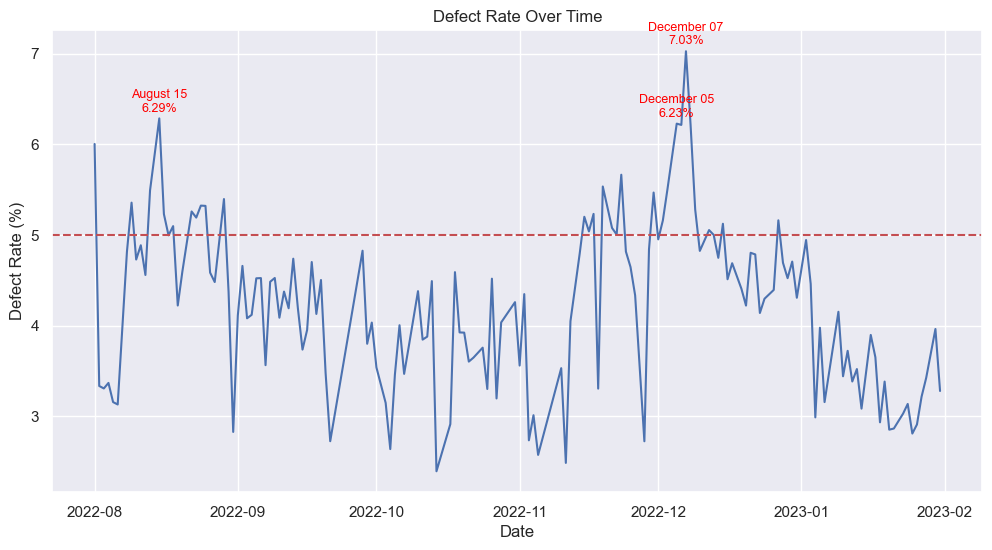

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the raw_data DataFrame by 'Date' and calculate the sum of 'Defects QTY' and 'Output QTY' for each date
grouped_data = raw_data.groupby('Date')[['Defects QTY', 'Output QTY']].sum().reset_index()

# Calculate the Defect rate by dividing the sum of 'Defects QTY' by the sum of 'Output QTY' for each date
grouped_data['Defect rate'] = grouped_data.apply(lambda row: row['Defects QTY'] / row['Output QTY'] * 100 if row['Output QTY'] != 0 else 0, axis=1)

# Set the plot style
sns.set(style="darkgrid")

# Create a line plot for the Defect rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Defect rate', data=grouped_data)

# Add a constant horizontal line at Defect rate = 5%
plt.axhline(5, color='r', linestyle='--')

# Add plot labels
plt.title('Defect Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Defect Rate (%)')

# Get the top 3 highest defect rates
top_3_defect_rates = grouped_data.nlargest(3, 'Defect rate')

# Annotate the top 3 highest defect rates with the month name and date
for index, row in top_3_defect_rates.iterrows():
    date_str = row['Date'].strftime('%B %d')
    defect_rate_str = f"{row['Defect rate']:.2f}%"
    annotation_text = f"{date_str}\n{defect_rate_str}"
    
    plt.annotate(annotation_text,
                 (row['Date'], row['Defect rate']),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center',
                 fontsize=9,
                 color='red')

# Show the plot
plt.show()

According to the output of above code, highest daily defect rate recorded by August 15, December 5 and December 7. And most days in 2022 - August, November and December months have recorded more than 5% defect rate which is above the acceptable defect rate which need to evaluate

### Daily defect rate variation from 2022-August to 2023-January

Let's try to display daily defect rate in each month more attractive way using ipywidgets library. In following code my moving slider we can identify daily defect rate in each month.

SelectionSlider(continuous_update=False, description='Month:', layout=Layout(width='50%'), options=('2022-08',…

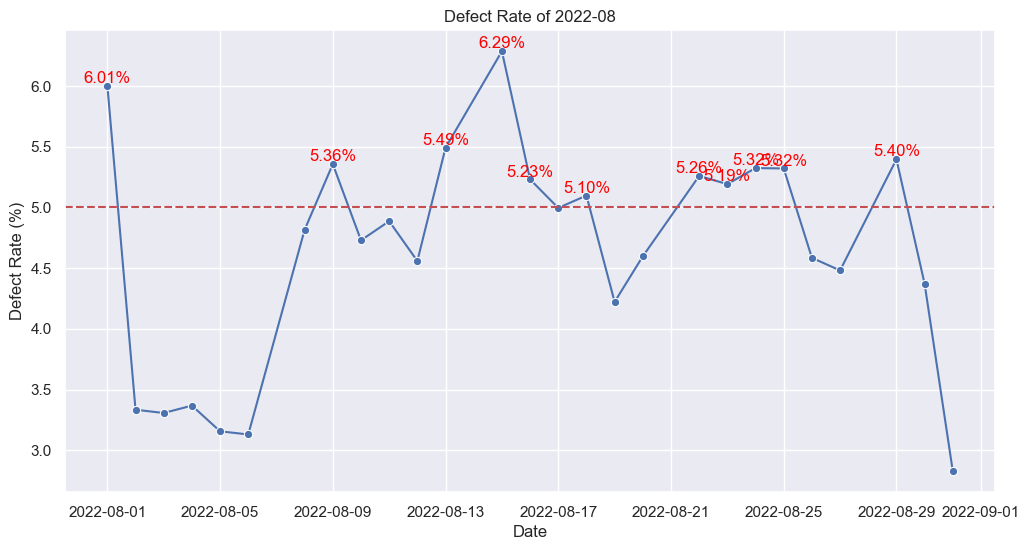

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a function to plot the graph
def plot_defect_rate_over_time(month_year):
    # Filter the data based on the selected month
    selected_month_data = raw_data[raw_data['Date'].dt.to_period('M') == month_year]

    # Group the selected_month_data DataFrame by 'Date' and calculate the sum of 'Defects QTY' and 'Output QTY' for each date
    grouped_data = selected_month_data.groupby('Date')[['Defects QTY', 'Output QTY']].sum().reset_index()

    # Calculate the Defect rate by dividing the sum of 'Defects QTY' by the sum of 'Output QTY' for each date
    grouped_data['Defect rate'] = grouped_data.apply(lambda row: row['Defects QTY'] / row['Output QTY'] * 100 
                                                     if row['Output QTY'] != 0 else 0, axis=1)

    # Set the plot style
    sns.set(style="darkgrid")

    # Create a line plot for the Defect rate over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Defect rate', data=grouped_data, marker='o')

    # Add a constant horizontal line at Defect rate = 5%
    plt.axhline(5, color='r', linestyle='--')

    # Add data labels for defect rates greater than 5
    for _, row in grouped_data[grouped_data['Defect rate'] > 5].iterrows():
        plt.text(row['Date'], row['Defect rate'], f"{row['Defect rate']:.2f}%", color='red', ha='center', va='bottom')

    # Add plot labels
    plt.title(f'Defect Rate of {month_year}')
    plt.xlabel('Date')
    plt.ylabel('Defect Rate (%)')

    plt.show()

# Create a slider to select the month
unique_month_years = sorted(raw_data['Date'].dt.to_period('M').unique().strftime('%Y-%m'))
month_year_slider = widgets.SelectionSlider(
    options=unique_month_years,
    description='Month:',
    disabled=False,
    continuous_update=False,
    layout=widgets.Layout(width='50%')
)

# Create a callback function to handle the slider value change
def on_month_year_slider_change(change):
    clear_output(wait=True)
    display(month_year_slider)
    plot_defect_rate_over_time(change['new'])

# Set the callback function to be called when the slider value changes
month_year_slider.observe(on_month_year_slider_change, names='value')

# Display the slider
display(month_year_slider)

# Plot the initial graph
plot_defect_rate_over_time(month_year_slider.value)

Based on above plot, Most days in August, November and December in 2022 Defect rates are greater than 5%

In [53]:
# Filter the data for dates with defect rates > 5%
filtered_data = raw_data.groupby('Date').agg(
    {'Defects QTY': 'sum', 'Output QTY': 'sum'}).reset_index()

filtered_data['Defect rate'] = filtered_data['Defects QTY'] / filtered_data['Output QTY'] * 100
filtered_data = filtered_data[filtered_data['Defect rate'] > 5]
filtered_data['Defect rate'] = filtered_data['Defect rate'].round(2)

# Add a 'Month' column to the filtered data
filtered_data['Month'] = filtered_data['Date'].dt.strftime('%B')

# Select the columns to keep in the final DataFrame
final_data = filtered_data[['Month', 'Date', 'Output QTY', 'Defects QTY', 'Defect rate']]

# Sort the final DataFrame by Date
final_data = final_data.sort_values('Date')


final_data

,Month,Date,Output QTY,Defects QTY,Defect rate
0,August,2022-08-01,19267,1157,6.01
7,August,2022-08-09,24527,1314,5.36
11,August,2022-08-13,18918,1039,5.49
12,August,2022-08-15,20231,1272,6.29
13,August,2022-08-16,22213,1162,5.23
15,August,2022-08-18,22949,1170,5.10
18,August,2022-08-22,20989,1104,5.26
19,August,2022-08-23,22302,1158,5.19
20,August,2022-08-24,20095,1070,5.32
21,August,2022-08-25,18340,976,5.32


The above code displays all the dates for which the defect rate is greater than 5%

### Dashboard for checked Total Output QTY, Defects QTY and Defect rate by month

Following code give dashboard for Total Defect rate for each month, and Total Output QTY with Defects QTY. It is useful to get quick overview about the Factory performance from 2022-August to 2023-January

In [54]:
import ipywidgets as widgets
import pandas as pd

# Calculate total sum of Output QTY, Defects QTY, and Defect rate for all 6 months
output_qty_total = raw_data['Output QTY'].sum()
defects_qty_total = raw_data['Defects QTY'].sum()
defect_rate_total = round((defects_qty_total / output_qty_total) * 100, 2)

# Calculate monthly sum of Output QTY, Defects QTY, and Defect rate
monthly_data = raw_data.groupby(raw_data['Date'].dt.to_period('M')).agg({
    'Output QTY': 'sum',
    'Defects QTY': 'sum'
})
monthly_data['Defect rate'] = round((monthly_data['Defects QTY'] / monthly_data['Output QTY']) * 100, 2)

# Sort the monthly data by date
monthly_data = monthly_data.sort_index()

# Create a dictionary of widgets for each month
cards = {}
for month in monthly_data.index:
    month_name = month.strftime('%Y-%b')
    output_qty = monthly_data.loc[month, 'Output QTY']
    defects_qty = monthly_data.loc[month, 'Defects QTY']
    defect_rate = monthly_data.loc[month, 'Defect rate']
    
    # Create widgets for the card
    title = widgets.HTML(f"<h3>{month_name}</h3>")
    output_qty_label = widgets.Label(value="Output QTY:")
    output_qty_value = widgets.Label(value=str(output_qty))
    defects_qty_label = widgets.Label(value="Defects QTY:")
    defects_qty_value = widgets.Label(value=str(defects_qty))
    defect_rate_label = widgets.Label(value="Defect rate:")
    defect_rate_value = widgets.Label(value=str(defect_rate) + "%")
    
    # Create a vertical box to hold the widgets for the card
    card_box = widgets.VBox([title, output_qty_label, output_qty_value, defects_qty_label, defects_qty_value,
                            defect_rate_label, defect_rate_value])
    
    # Add the card to the dictionary of cards
    cards[month_name] = card_box

# Create a tab widget to hold the cards
tab_contents = [cards[k] for k in sorted(cards.keys())]
tab = widgets.Tab()
tab.children = tab_contents

# Set the titles for the tabs
for i, month in enumerate(sorted(cards.keys())):
    tab.set_title(i, month)

# Create a widget for the total sums
total_output_qty_label = widgets.Label(value=f"Total Output QTY: {output_qty_total}")
total_defects_qty_label = widgets.Label(value=f"Total Defects QTY: {defects_qty_total}")
total_defect_rate_label = widgets.Label(value=f"Total Defect rate: {defect_rate_total}%")

# Create a vertical box to hold the total sums widget and the tab widget
dashboard = widgets.VBox([total_output_qty_label, total_defects_qty_label, total_defect_rate_label, tab])

# Set the dashboard style
dashboard.layout.border = 'solid 1px gray'
dashboard.layout.padding = '10px'

# Display the dashboard
display(dashboard)

### Monthly defect rate variation

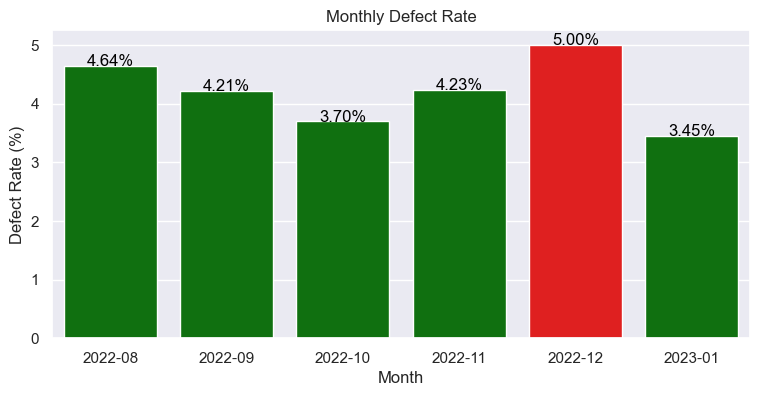

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the raw data by month and calculate the total output and defects quantity for each month
grouped_data = raw_data.groupby(raw_data['Date'].dt.strftime('%Y-%m')).agg({
    'Output QTY': 'sum',
    'Defects QTY': 'sum'
}).reset_index()

# Calculate the defect rate for each month
grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100

# Set the color of the bars based on the defect rate
colors = ['red' if rate >= 5 else 'green' for rate in grouped_data['Defect rate']]

# Create the bar chart
sns.set(style="darkgrid")
plt.figure(figsize=(9, 4))
sns.barplot(x='Date', y='Defect rate', data=grouped_data, palette=colors)

# Add data labels to the bar chart
for index, row in grouped_data.iterrows():
    plt.text(index, row['Defect rate'], f"{row['Defect rate']:.2f}%", color='black', ha='center')

# Add axis labels and title
plt.title("Monthly Defect Rate")
plt.xlabel("Month")
plt.ylabel("Defect Rate (%)")

plt.show()

2022-December Monthly Total defect rate is 5% mean, peformance of that month is not in the satisfied level. As shown above daily defect rate - line graph, so many days of the December month has higher defect rate

<a id="2.2"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">2.2 Sewing Line Performance</div>

In this analysis, we are only interested in the defect rates of sewing lines that are categorized under SEWING-KNIT department. Hence, we will be focusing only on the SEWING-KNIT lines for the period of August 2022 to January 2023 to see the total defect rates for each sewing line.

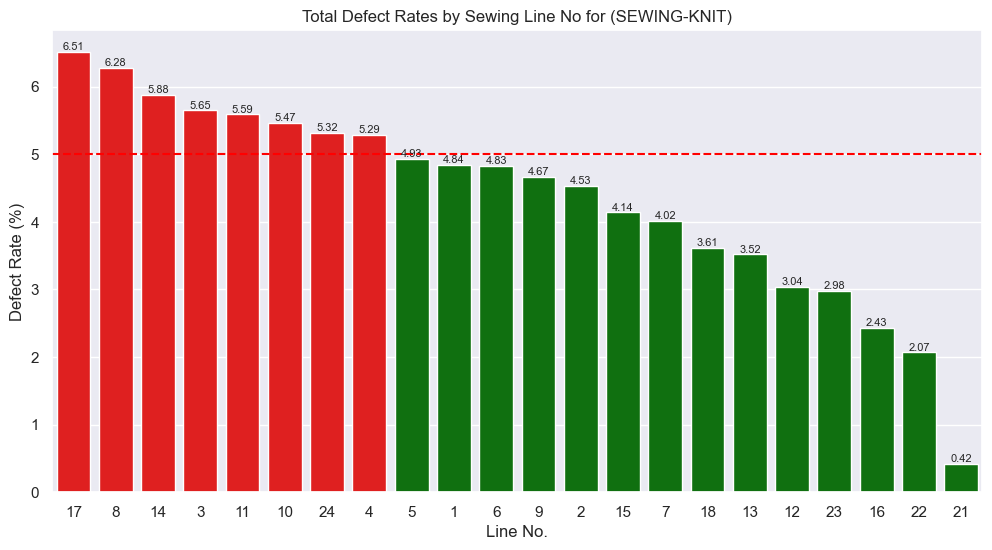

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by Sewing Line No. and Department and calculate the sum of Defects QTY and Output QTY for each group

raw_data['Sewing Line No'] = raw_data['Sewing Line No'].astype(str)
grouped_data = raw_data.groupby(['Sewing Line No', 'Department'])[['Defects QTY', 'Output QTY']].sum().reset_index()

# Calculate the Defect rate by dividing the sum of Defects QTY by the sum of Output QTY for each group
grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

# Filter the data for the SEWING-KNIT department
sewing_knit_data = grouped_data[grouped_data['Department'] == 'SEWING-KNIT']

# Sort by Defect rate in descending order
sewing_knit_data = sewing_knit_data.sort_values(by='Defect rate', ascending=False) 

# Set the plot style
sns.set(style="darkgrid")

# Create a bar plot for the Defect rate by Line No.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sewing_knit_data['Sewing Line No'], y=grouped_data['Defect rate'], data=sewing_knit_data,
                 palette=sns.color_palette(['green' if rate < 5 else 'red' for rate in sewing_knit_data['Defect rate']]))

# Add data labels for the Defect rate
for i, bar in enumerate(ax.containers):
    rate = sewing_knit_data.loc[sewing_knit_data.index[i], 'Defect rate']
    ax.bar_label(bar, label=f"{rate:.2f}%", label_type='edge', fontsize=8)

# Add a horizontal line at Defect rate = 5%
plt.axhline(5, color='red', linestyle='--')


# Add plot labels
plt.title('Total Defect Rates by Sewing Line No for (SEWING-KNIT)')
plt.xlabel('Line No.')
plt.ylabel('Defect Rate (%)')

plt.show()

Line 17 has the highest defect rate during this time period. Additionally, the defect rates of lines 17, 8, 14, 3, 11, 10, 24, and 4 are all greater than 5%, which suggests that further investigation is needed.

### Sewing Lines - Monthly Defect rates Trend 

Using below functions, I can select the sewing Line No and it will display the Defect rate Trend from 2022-August to 2023-January for selected sewing Line No

So, Let's visualize above Line No 17,8,14,3,11,10,24 and 4 Monthly Defect Trend

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create a Year-Month column
raw_data['Year-Month'] = pd.to_datetime(raw_data['Date']).dt.strftime('%Y-%m')

# Define a function to plot the Defect rate by Sewing Line No. for a given line and time period
def Monthly_defect_trend(line_no, start_date, end_date):
    
    # Filter the data for the given Sewing Line No. and time period
    data = raw_data[(raw_data['Sewing Line No'] == line_no) & 
                    (raw_data['Year-Month'] >= start_date) & 
                    (raw_data['Year-Month'] <= end_date)]
    
    # Group the data by Year-Month and calculate the sum of Defects QTY and Output QTY for each group
    grouped_data = data.groupby('Year-Month')[['Defects QTY', 'Output QTY']].sum().reset_index()

    # Calculate the Defect rate by dividing the sum of Defects QTY by the sum of Output QTY for each group
    grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
    grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

    # Set the plot style
    plt.style.use('seaborn-darkgrid')

    # Create a line plot for the Defect rate by Year-Month
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(grouped_data['Year-Month'], grouped_data['Defect rate'], marker='o')
    
    # Add data labels for the Defect rate
    for i, row in grouped_data.iterrows():
        ax.text(row['Year-Month'], row['Defect rate'], f"{row['Defect rate']}%",
                ha='center', va='bottom', fontsize=12)

    # Add a horizontal line at Defect rate = 5%
    plt.axhline(5, color='red', linestyle='--')
    
    # Add plot labels
    plt.title(f"Defect Rates for Sewing Line No. {line_no}")
    plt.xlabel('Year-Month')
    plt.ylabel('Defect Rate (%)')

    plt.show()

# Create widgets for selecting the Sewing Line No and time period
line_no_widget = widgets.Dropdown(options=list(raw_data[raw_data['Department'] == 'SEWING-KNIT']['Sewing Line No'].unique()), description='Sewing Line No:')

# Define a function to handle the button click event
def on_button_click(b):
    line_no = line_no_widget.value
    start_date = '2022-08'
    end_date = '2023-01'
    Monthly_defect_trend(line_no, start_date, end_date)

# Create a button widget and set the on_click event
button = widgets.Button(description='Plot Defect Rate')
button.on_click(on_button_click)

# Display the widgets and button
display(line_no_widget, button)

Dropdown(description='Sewing Line No:', options=('4', '23', '7', '9', '1', '8', '14', '16', '24', '11', '13', …

Button(description='Plot Defect Rate', style=ButtonStyle())

User can interactive with above function by selecting the Sewing Line No and it will display the Defect rate Trend from 2022 August to 2023 January

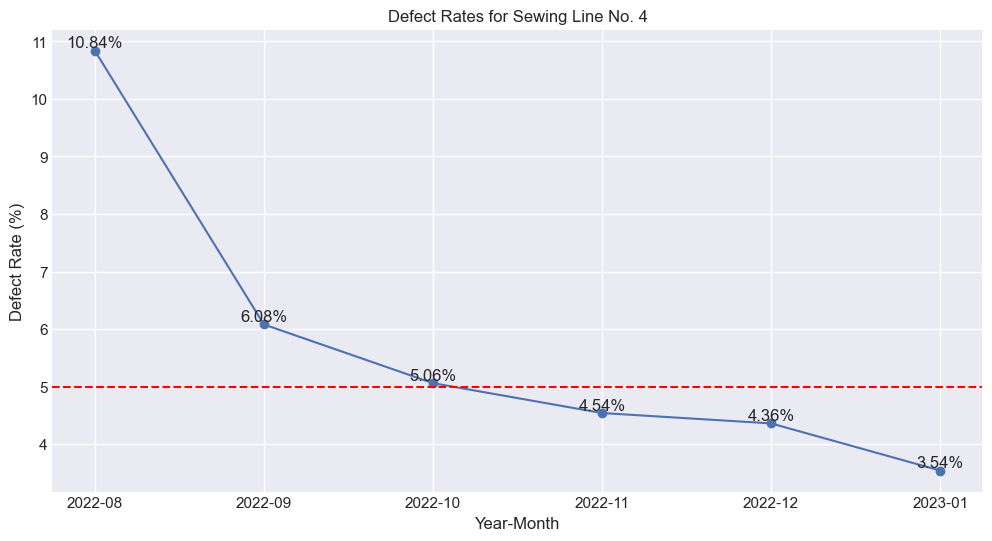

In [58]:
Monthly_defect_trend('4','2022-08','2023-01')

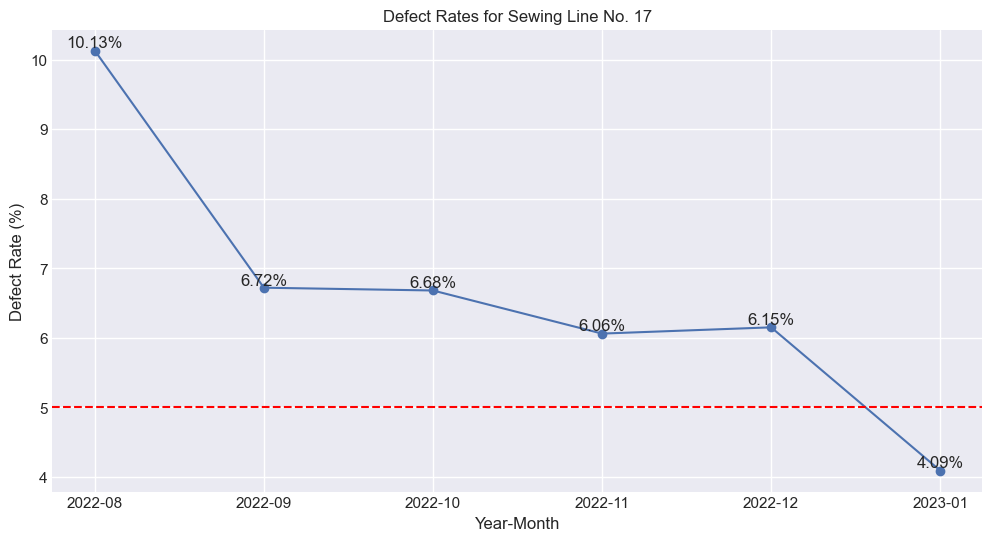

In [59]:
Monthly_defect_trend('17','2022-08','2023-01')

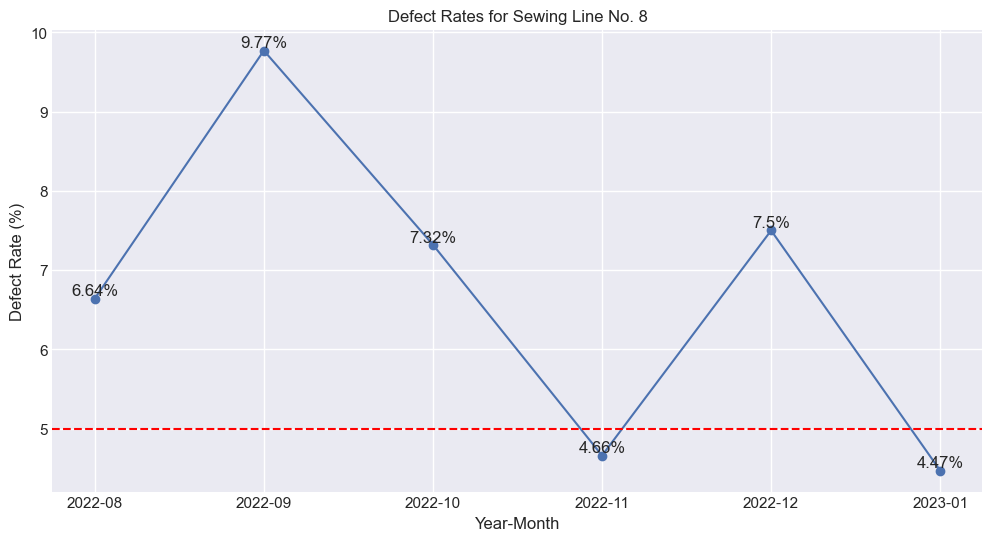

In [60]:
Monthly_defect_trend('8','2022-08','2023-01')

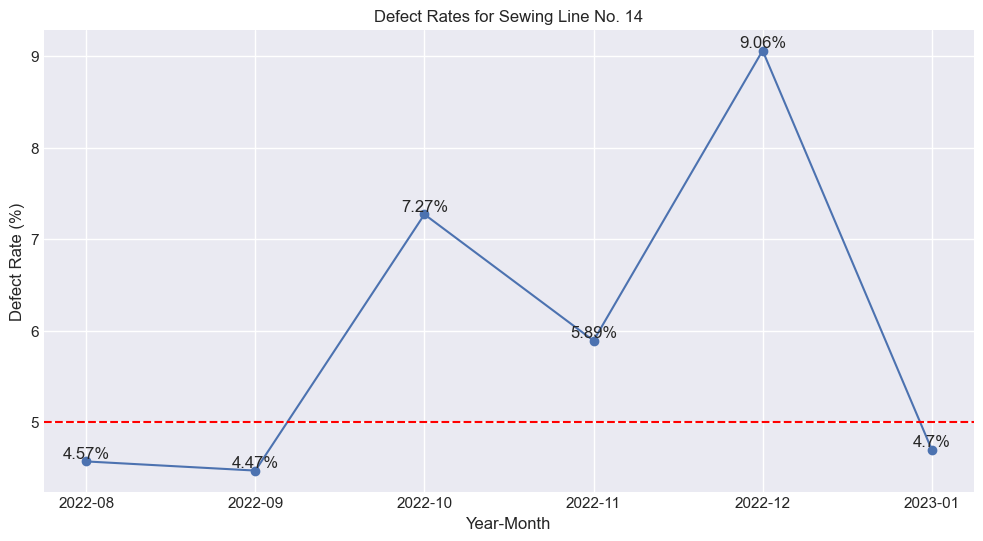

In [61]:
Monthly_defect_trend('14','2022-08','2023-01')

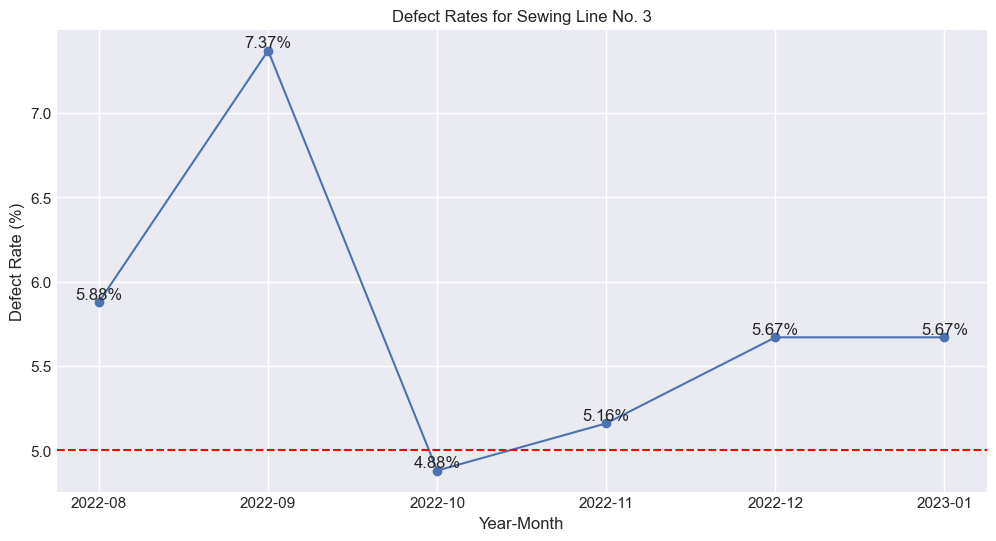

In [62]:
Monthly_defect_trend('3','2022-08','2023-01')

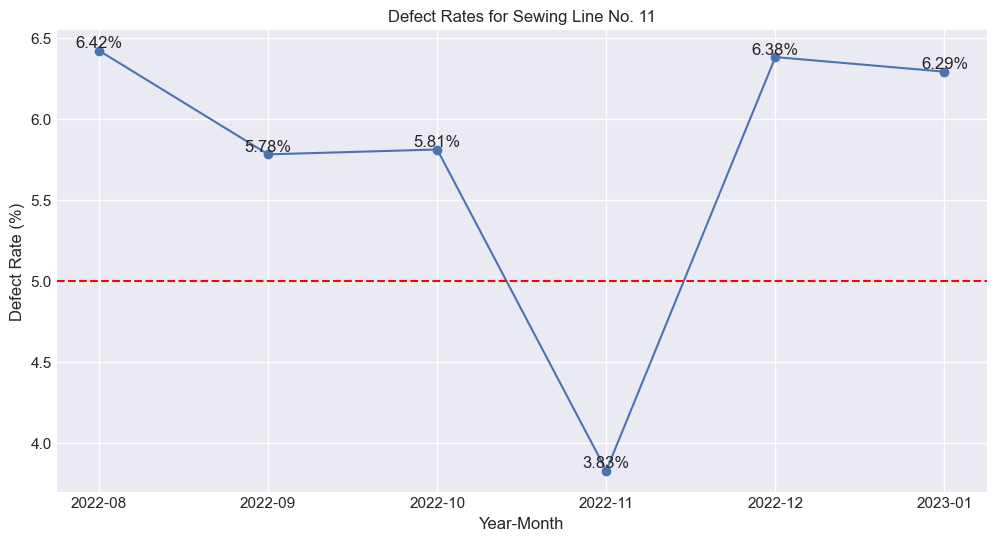

In [63]:
Monthly_defect_trend('11','2022-08','2023-01')

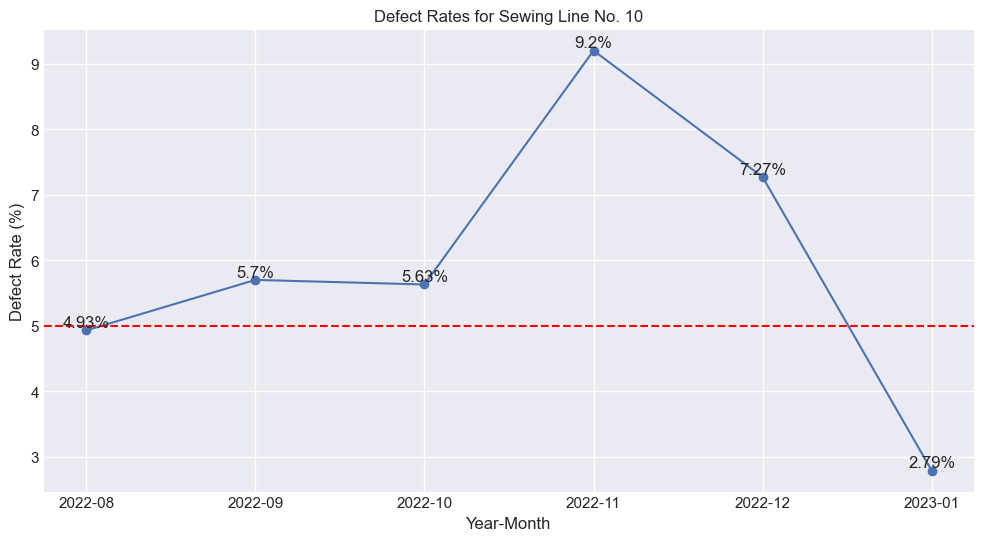

In [64]:
Monthly_defect_trend('10','2022-08','2023-01')

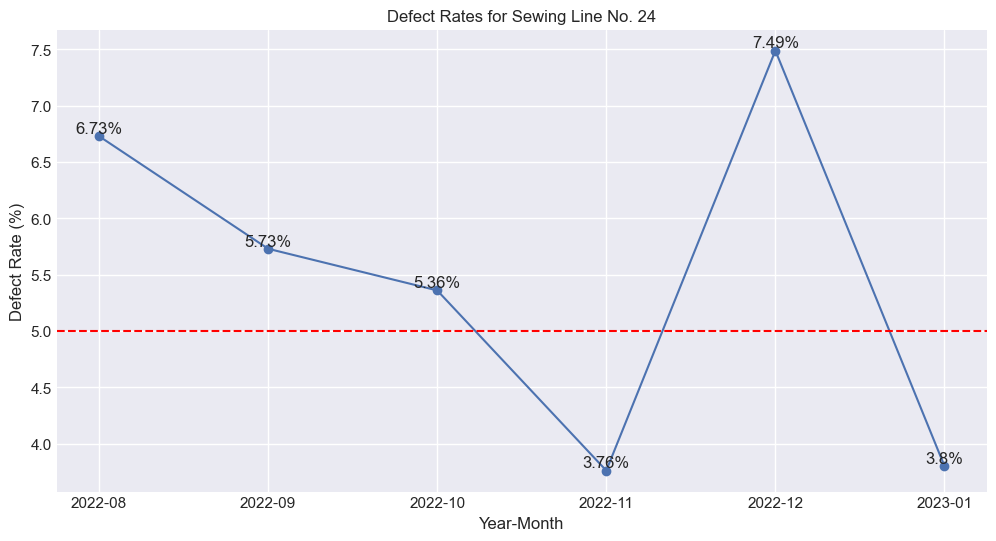

In [65]:
Monthly_defect_trend('24','2022-08','2023-01')

According to the above results it seems that above sewing Lines except Line 4 and Line 17, All other sewing Lines has very high monthly defect rates and it has non-consistent variation which mean QC worker must need to pay their attention for Line 8,14,3,11,10,24 in up coming months. Here, Line 17 - defect rate is greter than 5% until January, but we can see decreasing trend for Line 17Based on the above analysis, it appears that all the sewing lines, except Line 4 and Line 17, have very high monthly defect rates with inconsistent variations. Thus, the quality control (QC) workers need to focus on improving the defect rates for Lines 8, 14, 3, 11, 10, and 24 in the upcoming months.

It's worth noting that Line 17 had a defect rate greater than 5% until January, but there seems to be a decreasing trend for this line. Hence, the QC team should continue monitoring and analyzing the defect rates for all the sewing lines to ensure continuous improvement in the quality of the products.

<a id="2.3"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">2.3 Buyer - Defect Data Analysis </div>

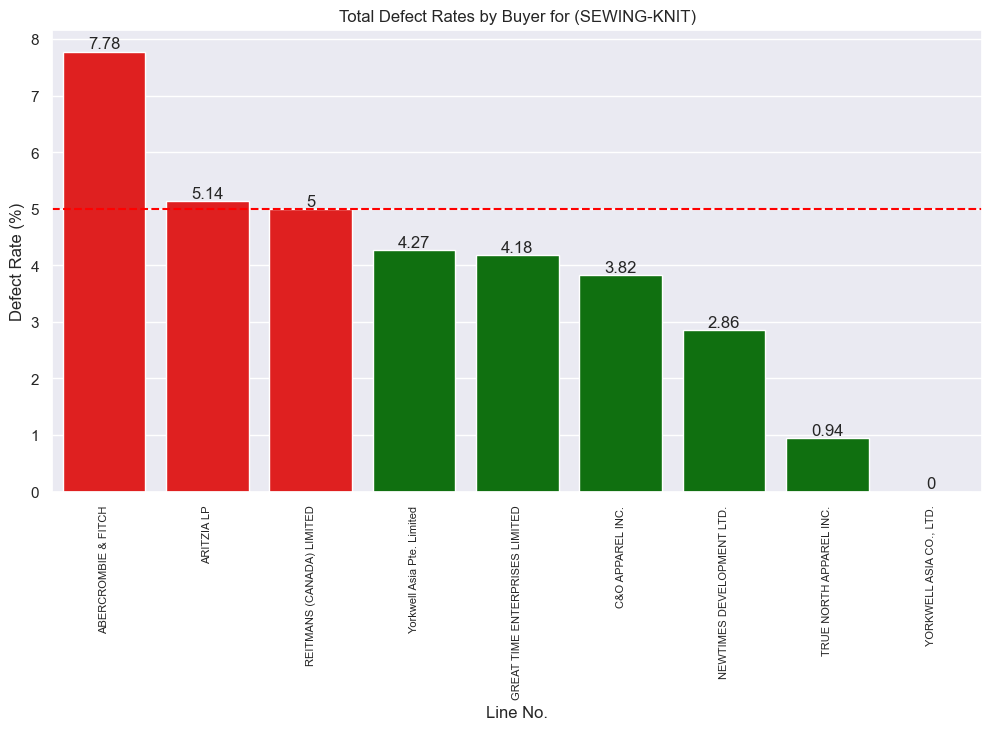

In [66]:
# Group the data by Buyer Name and Department and calculate the sum of Defects QTY and Output QTY for each group

grouped_data = raw_data.groupby(['Buyer Name', 'Department'])[['Defects QTY', 'Output QTY']].sum().reset_index()

# Calculate the Defect rate by dividing the sum of Defects QTY by the sum of Output QTY for each group
grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

# Filter the data for the SEWING-KNIT department
sewing_knit_data = grouped_data[grouped_data['Department'] == 'SEWING-KNIT']

# Sort by Defect rate in descending order
sewing_knit_data = sewing_knit_data.sort_values(by='Defect rate', ascending=False) 

# Set the plot style
sns.set(style="darkgrid")

# Create a bar plot for the Defect rate by Line No.
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sewing_knit_data['Buyer Name'], y=sewing_knit_data['Defect rate'], data=sewing_knit_data,
                 palette=sns.color_palette(['green' if rate < 5 else 'red' for rate in sewing_knit_data['Defect rate']]))

# Add data labels for the Defect rate
for i, bar in enumerate(ax.containers):
    rate = sewing_knit_data.loc[sewing_knit_data.index[i], 'Defect rate']
    ax.bar_label(bar, label=f"{rate:.2f}%", label_type='edge', fontsize=12)

# Rotate the tick labels and reduce font size
plt.xticks(rotation=90, fontsize=8)
    
# Add a horizontal line at Defect rate = 5%
plt.axhline(5, color='red', linestyle='--')


# Add plot labels
plt.title('Total Defect Rates by Buyer for (SEWING-KNIT)')
plt.xlabel('Line No.')
plt.ylabel('Defect Rate (%)')

plt.show()

Based on the analysis, it appears that Aritzia, Reitmans,A&F and Costco are the primary buyers of the company, but the orders from A&F buyer are currently very low. The defect rate for A&F is found to be very high, indicating that there are serious quality control issues that need to be addressed immediately. On the other hand, the defect rate for Aritzia and Reitmans is around 5%, which means that constant monitoring is necessary to maintain the quality of products delivered to these buyers

### Buyer - Monthly Defect rates Trend

In [67]:
raw_data['Buyer Name'].unique()

array(['GREAT TIME ENTERPRISES LIMITED', 'C&O APPAREL INC.', 'ARITZIA LP',
       'REITMANS (CANADA) LIMITED', 'Yorkwell Asia Pte. Limited',
       'ABERCROMBIE & FITCH', 'NEWTIMES DEVELOPMENT LTD.',
       'TRUE NORTH APPAREL INC.', 'YORKWELL ASIA CO., LTD.'], dtype=object)

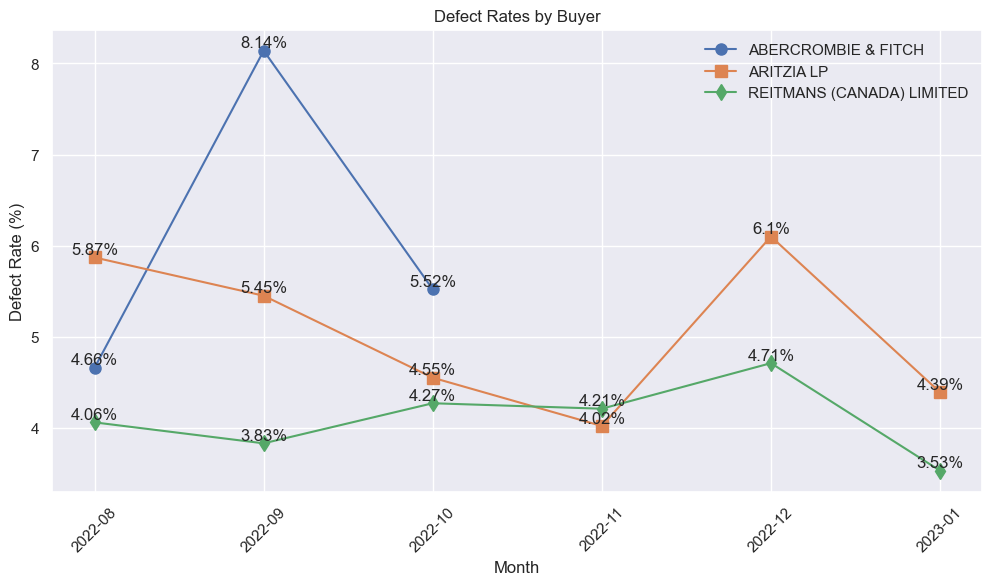

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for A&F, Aritzia, and Reitman buyers
buyers = ['ABERCROMBIE & FITCH', 'ARITZIA LP', 'REITMANS (CANADA) LIMITED']
data = raw_data[raw_data['Buyer Name'].isin(buyers)].copy()  # create a copy of the sliced data

# Convert Date column to datetime format and extract Year-Month
data['Year-Month'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m')

# Group the data by Buyer Name and Year-Month and calculate the Defect rate
grouped_data = data.groupby(['Buyer Name', 'Year-Month'])[['Defects QTY', 'Output QTY']].sum().reset_index()
grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

# Filter the data for the specified months
months = ['2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01']
plot_data = grouped_data[grouped_data['Year-Month'].isin(months)].copy()  # create a copy of the sliced data

# Set the plot style
sns.set_style('darkgrid')

# Create a line plot for each buyer
plt.figure(figsize=(12,6))
markers = ['o', 's', 'd']  # define markers for each buyer
for i, buyer in enumerate(buyers):
    plot_data_buyer = plot_data[plot_data['Buyer Name']==buyer]
    plt.plot(plot_data_buyer['Year-Month'], plot_data_buyer['Defect rate'], 
             label=buyer, marker=markers[i], markersize=8)
    for j, rate in enumerate(plot_data_buyer['Defect rate']):
        plt.text(plot_data_buyer.iloc[j]['Year-Month'], rate, f"{rate}%",
                 ha='center', va='bottom', fontsize=12)

# Add plot labels and legend
plt.title('Defect Rates by Buyer')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Defect Rate (%)')
plt.legend()

plt.show()

Based on the analysis, it appears that A&F buyer did not place any orders after October 2022. However, there was a significant defect rate issue with the A&F buyer in the month of September. Further investigation is required to identify the root cause of this issue.

For Aritzia buyer, the defect rate has exceeded 5% for most of the months, which indicates the need for a thorough investigation to identify the problematic style numbers.

On the other hand, Reitmans has consistently maintained a monthly defect rate below 5% for all 6 months. Nevertheless, further investigation is still required to identify any potential issues with specific style numbers.

<a id="2.4"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">2.4 Style No Defect Data Analysis </div>

To begin with, let's create an interactive dashboard for displaying the top 10 Style No with the highest Defect rate. Once we identify these worst performing styles, we can further analyze them by buyer to determine the root cause of the high defect rate. To achieve this, we have created a function that allows users to select a buyer and a month, and then displays a bar chart of the top 10 Style No with the highest defect rates for that specific selection. And then another function created to display more data where user can identify which Sewing Line cause to that matter.

This will enable us to easily pinpoint the styles that require our attention and resources, helping us to implement targeted improvements and achieve better quality control across the board.

### Function 1: Plot Top 10 Highest Defect rate Style No by user selection

In [69]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt


# Convert Date column to datetime format and extract Year-Month
raw_data['Year-Month'] = pd.to_datetime(raw_data['Date']).dt.strftime('%Y-%m')

# Define a function to plot the Defect rate by Style No. for a given Buyer Name and month
def plot_defect_rate(buyer_name, month):
    
    # Filter the data for the given Buyer Name and month
    data = raw_data[(raw_data['Buyer Name'] == buyer_name) & 
                    (raw_data['Year-Month'] == month)]
    
    # Group the data by Style No. and calculate the sum of Defects QTY and Output QTY for each group
    grouped_data = data.groupby('Style No')[['Defects QTY', 'Output QTY']].sum().reset_index()

    # Calculate the Defect rate by dividing the sum of Defects QTY by the sum of Output QTY for each group
    grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
    grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

    # Sort the data by Defect rate in descending order and select the top 10 Style No.
    top_10 = grouped_data.sort_values(by='Defect rate', ascending=False).head(10)
    
    # Set the plot style
    plt.style.use('seaborn-darkgrid')

    # Create a bar plot for the top 10 Style No. by Defect rate
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Defect rate', y='Style No', data=top_10, 
                 palette=sns.color_palette(['green' if rate < 5 else 'red' for rate in top_10['Defect rate']]))

    # Add data labels for the Defect rate
    for i, bar in enumerate(ax.containers):
        rate = top_10.loc[top_10.index[i], 'Defect rate']
        ax.bar_label(bar, label=f"{rate:.2f}%", label_type='edge', fontsize=8)

    # Add a horizontal line at Defect rate = 5%
    plt.axvline(5, color='red', linestyle='--')

    # Add plot labels
    plt.title(f"Defect rate of Worst Performing Style No for {buyer_name} in {month}")
    plt.xlabel('Style No')
    plt.ylabel('Defect Rate (%)')

    plt.show()

# Create widgets for selecting the Buyer Name and month
buyer_widget = widgets.Dropdown(options=list(raw_data['Buyer Name'].unique()), description='Buyer Name:')
month_widget = widgets.Dropdown(options=list(raw_data['Year-Month'].unique()), description='Month:')

# Define a function to handle the button click event
def on_button_click(b):
    buyer_name = buyer_widget.value
    month = month_widget.value
    plot_defect_rate(buyer_name, month)

# Create a button widget and set the on_click event
button = widgets.Button(description='Plot Defect Rate')
button.on_click(on_button_click)

# Display the widgets and button
display(buyer_widget, month_widget, button)

Dropdown(description='Buyer Name:', options=('GREAT TIME ENTERPRISES LIMITED', 'C&O APPAREL INC.', 'ARITZIA LP…

Dropdown(description='Month:', options=('2023-01', '2022-10', '2022-11', '2022-12', '2022-08', '2022-09'), val…

Button(description='Plot Defect Rate', style=ButtonStyle())

### Function 2: Provide a dataframe which contain more details based on the user selection

In [70]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Convert Date column to datetime format and extract Year-Month
raw_data['Year-Month'] = pd.to_datetime(raw_data['Date']).dt.strftime('%Y-%m')

# Create a function to display the data for a given buyer and month
def display_data(buyer_name, month):
    # Filter the data for the given buyer and month
    data = raw_data[(raw_data['Buyer Name'] == buyer_name) & 
                    (raw_data['Year-Month'] == month)]

    # Group the data by Month, Style No, and Sewing Line No, and calculate the sum of Defects QTY and Output QTY for each group
    grouped_data = data.groupby(['Year-Month', 'Style No', 'Sewing Line No'])[['Defects QTY', 'Output QTY']].sum().reset_index()

    # Calculate the Defect rate by dividing the sum of Defects QTY by the sum of Output QTY for each group
    grouped_data['Defect rate'] = grouped_data['Defects QTY'] / grouped_data['Output QTY'] * 100
    grouped_data['Defect rate'] = grouped_data['Defect rate'].apply(lambda x: round(x, 2))

    # Set the column order and display the data
    cols = ['Year-Month', 'Style No', 'Sewing Line No', 'Output QTY', 'Defects QTY', 'Defect rate']
    display(grouped_data[cols].sort_values(by='Defect rate', ascending=False).head(10))

# Create widgets for selecting the Buyer Name and Month
buyer_widget2 = widgets.Dropdown(options=list(raw_data['Buyer Name'].unique()), description='Buyer Name:')
month_widget2 = widgets.Dropdown(options=list(raw_data['Year-Month'].unique()), description='Year-Month:')

# Define a function to handle the button click event
def on_button_click(b):
    buyer_name = buyer_widget2.value
    month = month_widget2.value
    display_data(buyer_name, month)

# Create a button widget and set the on_click event
button2 = widgets.Button(description='Display Data')
button2.on_click(on_button_click)

# Display the widgets and button
display(buyer_widget2, month_widget2, button2)

Dropdown(description='Buyer Name:', options=('GREAT TIME ENTERPRISES LIMITED', 'C&O APPAREL INC.', 'ARITZIA LP…

Dropdown(description='Year-Month:', options=('2023-01', '2022-10', '2022-11', '2022-12', '2022-08', '2022-09')…

Button(description='Display Data', style=ButtonStyle())

### Function 3: Plot Top 5 Highest Defect Name based on the Defects QTY 

Let's consider defects_data table, Note that there were not Buyer Name column in the defects_data table. In this Analysis we are only focusing main buyers of the company. Therefore, let's add only Main 5 buyers names as new column to the defects_data table

In [71]:
# Define a function to get the buyer name based on the Style No
def get_buyer_name(style_no):
    if style_no.startswith('PTAF'):
        return 'A&F'
    elif style_no.startswith('PTAR') or style_no.startswith('GPAR'):
        return 'Aritzia'
    elif style_no.startswith('PTCOC'):
        return 'Costco'
    elif style_no.startswith('PTRT'):
        return 'Reitmans'
    elif style_no.startswith('PTCOU'):
        return 'Great Time Enterprised LTD'
    else:
        return 'Other'

# Add a new column to the defects_data table representing the Buyer Name based on the Style No
defects_data['Buyer Name'] = defects_data['Style No'].apply(get_buyer_name)

In [72]:
defects_data.head()

,Date,QC1 ID,QC1 Worker Name,Sewing Line No,Style No,Defect Code,Defect Name,Defects QTY,Department,Buyer Name
0,8/1/2022,YM6241,Mao Chanthy,9,PTAF0018,3.0,Twisted,2,SEWING-KNIT,A&F
1,8/1/2022,YM4736,Tun Sreyrath,9,PTAF0018,1.0,Uneven/ Asymmetry,1,SEWING-KNIT,A&F
3,8/1/2022,YM4178,Maeuk Chetna,16,PTAF0022,1.0,Uneven/ Asymmetry,2,SEWING-KNIT,A&F
4,8/1/2022,YM6371,Rym Sreynet,16,PTAF0022,11.0,Dirty stain,1,SEWING-KNIT,A&F
5,8/1/2022,YM5711,Em Thou,18,PTAF0023,6.0,Skipped stitches,1,SEWING-KNIT,A&F


Using below Function user can select the Buyer Name, Style No and Month from the dropdown list and it will display top 5 highest defect recorded for user selection 

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

# Define a function to create the plot
def plot_top_defects(buyer_name, style_no, month):
    # Filter the data for the selected buyer, style, and month
    filtered_data = defects_data[(defects_data['Buyer Name'] == buyer_name) & 
                                 (defects_data['Style No'] == style_no) &
                                 (pd.to_datetime(defects_data['Date']).dt.strftime('%B %Y') == month)]

    # Group the data by Defect Name and calculate the sum of Defects QTY for each group
    grouped_data = filtered_data.groupby('Defect Name')['Defects QTY'].sum().reset_index()

    # Check if there are any defects for the selected criteria
    if grouped_data.empty:
        print("No defects found for the selected criteria.")
        return

    # Sort the data by Defects QTY in descending order and select the top 5 defects
    top_defects = grouped_data.sort_values('Defects QTY', ascending=False).head(5)

    # Set the plot style
    sns.set(style='darkgrid')

    # Create a bar plot for the top 5 defects
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x='Defect Name', y='Defects QTY', data=top_defects) 
                     
    # Add data labels for the Defects QTY
    for i, bar in enumerate(ax.containers):
        qty = top_defects.loc[top_defects.index[i], 'Defects QTY']
        ax.bar_label(bar, label=f"{qty:.0f}", label_type='edge', fontsize=10)

    # Add plot labels
    plt.title(f'Top 5 Defects by Defects QTY for {buyer_name} - Style No: {style_no} - {month}')
    plt.xlabel('Defect Name')
    plt.ylabel('Defects QTY')
    
    # Rotate the tick labels and reduce font size
    plt.xticks(rotation=45, fontsize=9)
    
    plt.show()

# Define the dropdown menus for buyer, style, and month
buyer_dropdown = Dropdown(options=defects_data['Buyer Name'].unique())
style_dropdown = Dropdown()
month_dropdown = Dropdown(options=pd.to_datetime(defects_data['Date']).dt.strftime('%B %Y').unique())

# Define the function to update the style dropdown based on the selected buyer
def update_style_options(*args):
    filtered_data = defects_data[defects_data['Buyer Name'] == buyer_dropdown.value]
    style_dropdown.options = filtered_data['Style No'].unique()

# Update the style dropdown options when the buyer dropdown is changed
buyer_dropdown.observe(update_style_options, 'value')

# Define the function to interact with the plot
def update_plot(buyer_name, style_no, month):
    plot_top_defects(buyer_name, style_no, month)
    
interact(update_plot, 
         buyer_name=buyer_dropdown, 
         style_no=style_dropdown, 
         month=month_dropdown)

interactive(children=(Dropdown(description='buyer_name', options=('A&F', 'Aritzia', 'Other', 'Costco', 'Reitma…

<function __main__.update_plot(buyer_name, style_no, month)>

By using the three aforementioned functions, users can interactively identify the root cause of higher defect rates for any specific Style No. In this particular analysis, I will be examining the A&F, Aritzia, and Reitmans buyers to determine the underlying cause of elevated defect rates for certain Style No.

___
* _Diagnostic Analysis 1: Why A&F Buyer has high defect rate?_
___

Let's investigate the root cause of high defect rate of A&F buyer during September and October by analyzing the style numbers.

First, let's see the results for the month of August for A&F buyer. Even though it has a lower monthly defect rate in August, some Style No may have performed poorly

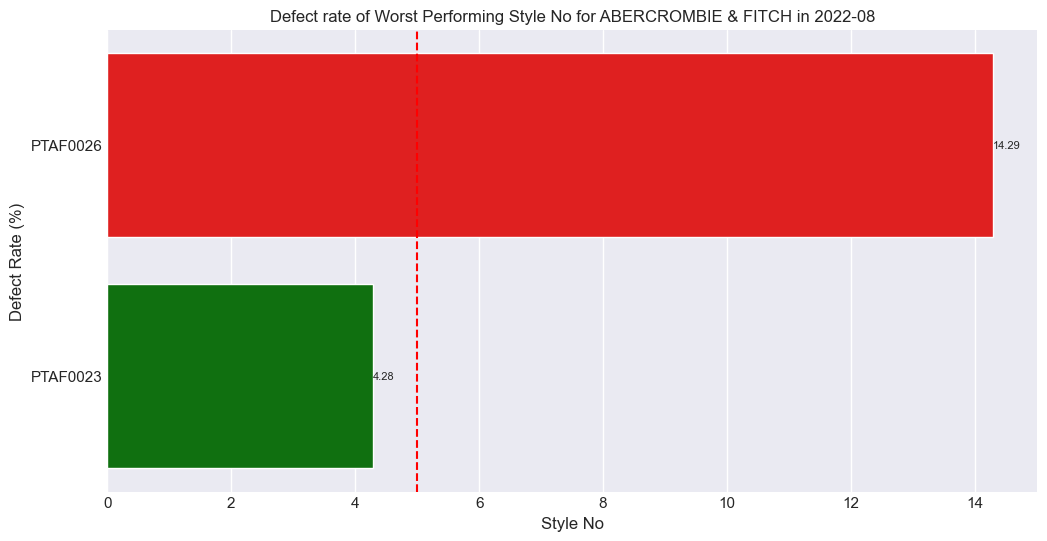

In [74]:
plot_defect_rate('ABERCROMBIE & FITCH', '2022-08')

There were two Style No running in the Sewing Line for A&F buyer in 2022-August and it seems "PTAF0026" Style No has the issue with extremly high defect rate of 14.29%

Let's see more additional information to clarify the issue. 

In [75]:
display_data('ABERCROMBIE & FITCH', '2022-08')

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
1,2022-08,PTAF0026,8,77,11,14.29
0,2022-08,PTAF0023,18,1941,83,4.28


PTAF0026 Style No was only running in the Line 8 and it has very low Output. Therefore, we can safely assume there is no big issue for August Month for A&F Buyer

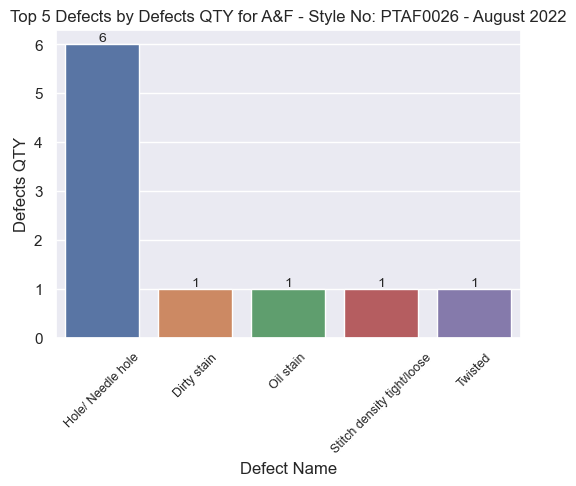

In [76]:
plot_top_defects('A&F','PTAF0026','August 2022')

The primary reason for the higher defect rates of PTAF0026 Style in August is due to Hole/Needle Hole defects. However, since the Output QTY is very low, we can neglect it. Nonetheless, this is just the beginning of the production for that style, and it would be interesting to observe how it performs in the following month.

Let's see the results for September Month

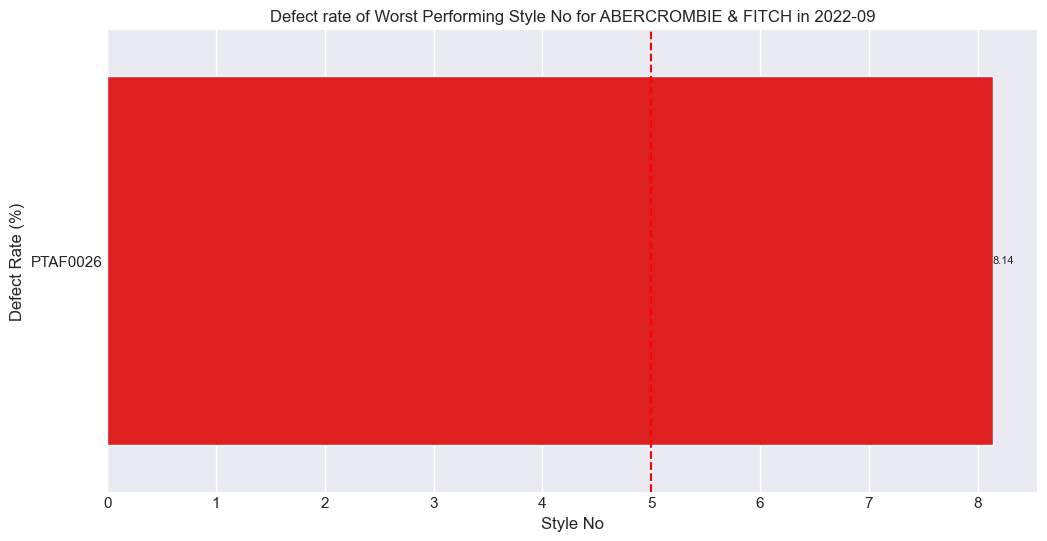

In [77]:
plot_defect_rate('ABERCROMBIE & FITCH', '2022-09')

In [78]:
display_data('ABERCROMBIE & FITCH', '2022-09')

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
1,2022-09,PTAF0026,8,12049,1177,9.77
0,2022-09,PTAF0026,1,9870,826,8.37
2,2022-09,PTAF0026,9,6588,318,4.83


According to the previous findings, it was observed that PTAF0026 style No started sewing in August and was in production in three sewing lines. Moreover, the highest total defect rates for September were caused by Line No 1 and Line No 8.

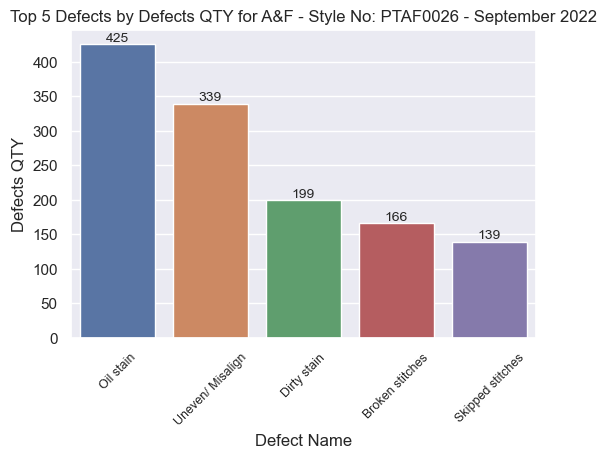

In [79]:
plot_top_defects('A&F','PTAF0026','September 2022')

The data suggests that the A&F buyer had a significant issue with oil stains during September. Additionally, the defect type of Uneven/Misalign has a high impact on the overall defect rate.

Let's see the results for October Month

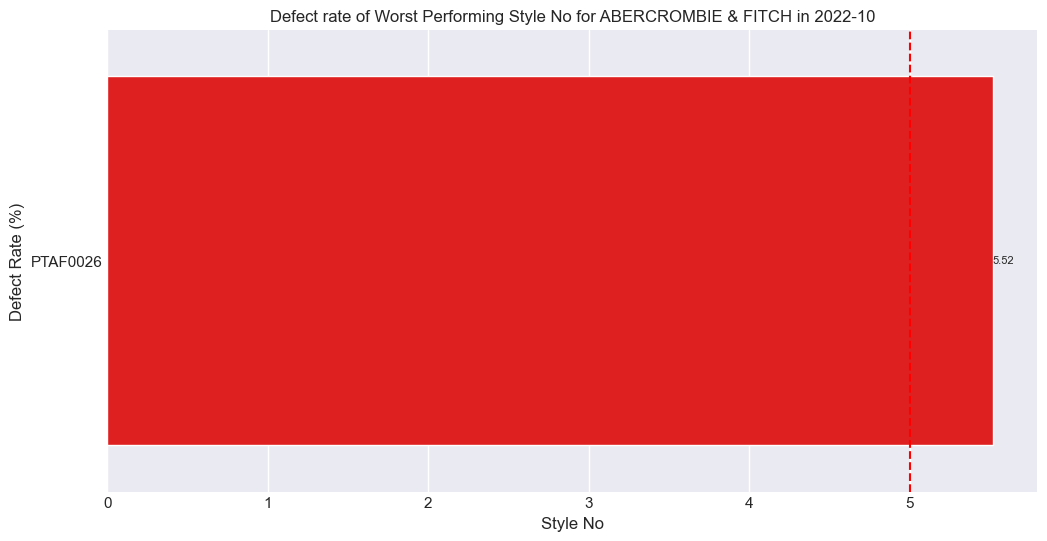

In [80]:
plot_defect_rate('ABERCROMBIE & FITCH', '2022-10')

In [81]:
display_data('ABERCROMBIE & FITCH', '2022-10')

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
1,2022-10,PTAF0026,8,996,61,6.12
0,2022-10,PTAF0026,1,321,16,4.98
2,2022-10,PTAF0026,9,421,19,4.51


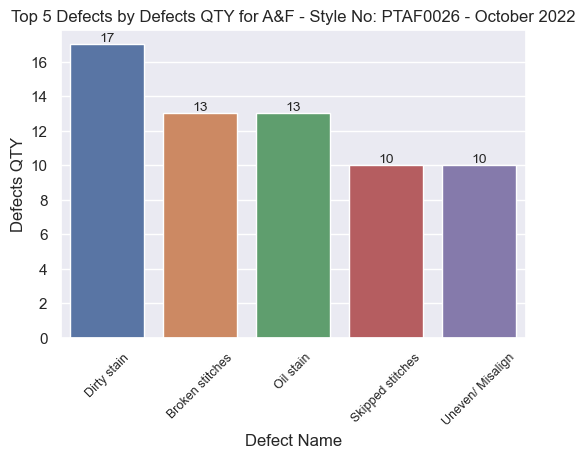

In [82]:
plot_top_defects('A&F','PTAF0026','October 2022')

After analyzing the results for the October month, it is evident that the monthly output was lower in comparison to September. It is apparent that production was completed in October month. The above results indicate that only Line No. 8 had a higher defect rate, but it showed an improvement in performance compared to the previous month. And also, it is worth notice that Huge oil stain issue in previous month has been solved for 'PTAF0026' style No 

___
* _Diagnostic Analysis 2: Why Aritzia Buyer has high defect rate?_
___

Let's do the same analysis for Aritzia Buyer to identify the root case of having higher defect rates in August, September and December. Here, All of the Months will be anlyzed for Aritzia buyer becasue there was a complain came from Aritzia buer during November

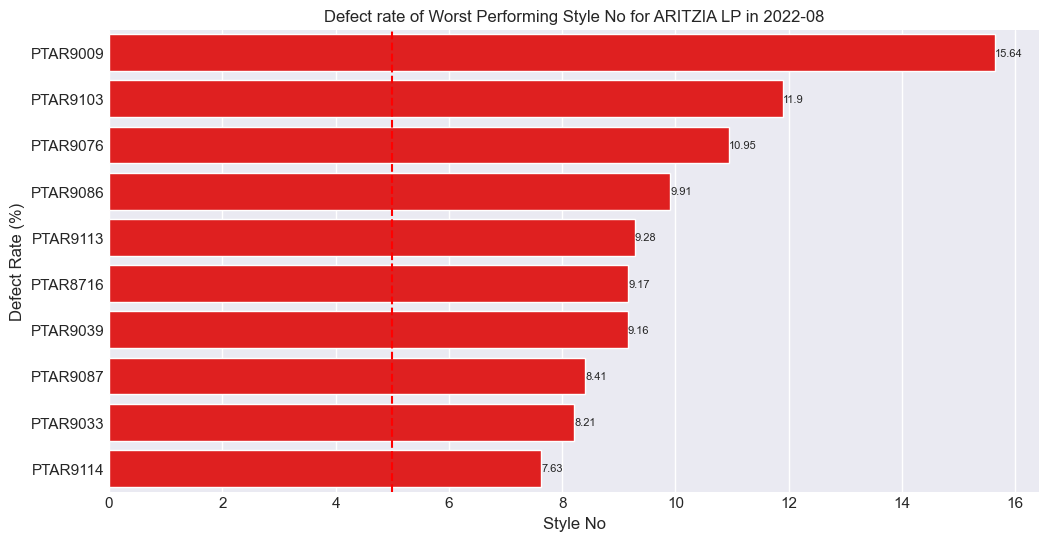

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
13,2022-08,PTAR9009,4,3586,561,15.64
48,2022-08,PTAR9103,5,2840,338,11.90
27,2022-08,PTAR9033,8,1904,210,11.03
41,2022-08,PTAR9076,4,4365,478,10.95
42,2022-08,PTAR9086,5,323,32,9.91
51,2022-08,PTAR9113,8,847,80,9.45
50,2022-08,PTAR9113,1,2795,258,9.23
1,2022-08,PTAR8716,3,2387,219,9.17
30,2022-08,PTAR9039,3,2565,235,9.16
26,2022-08,PTAR9033,1,526,45,8.56


In [83]:
plot_defect_rate('ARITZIA LP', '2022-08')
display_data('ARITZIA LP', '2022-08')

It seems Like PTAR9009, PTAR9103, PTAR9076, PTAR9113, PTAR8716 and PTAR9039 Style No have big issue in August Month

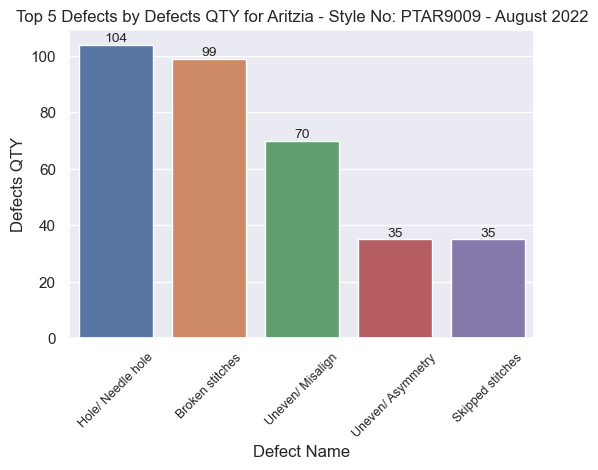

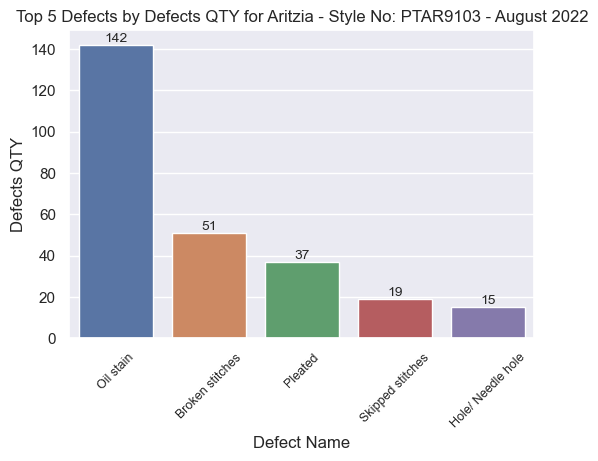

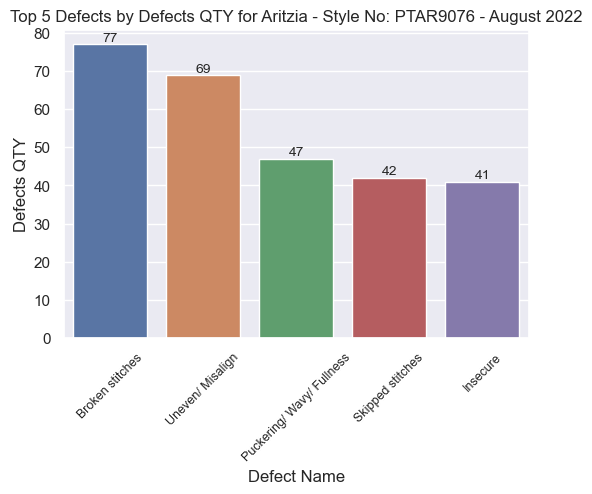

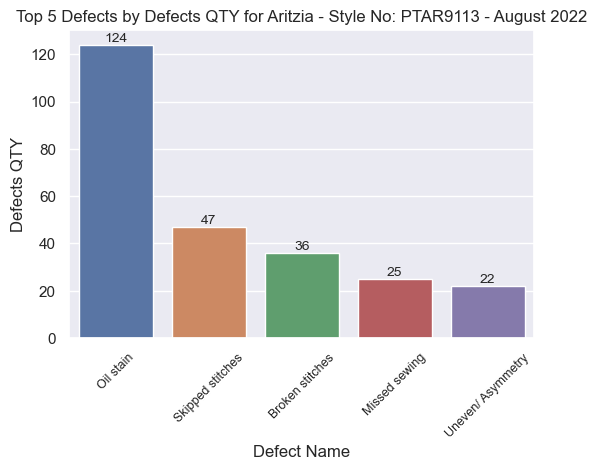

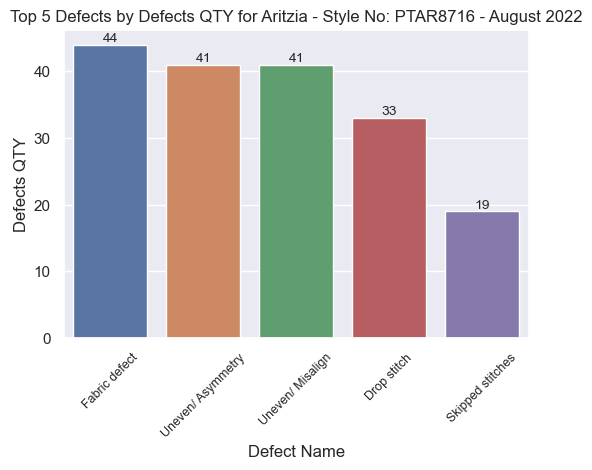

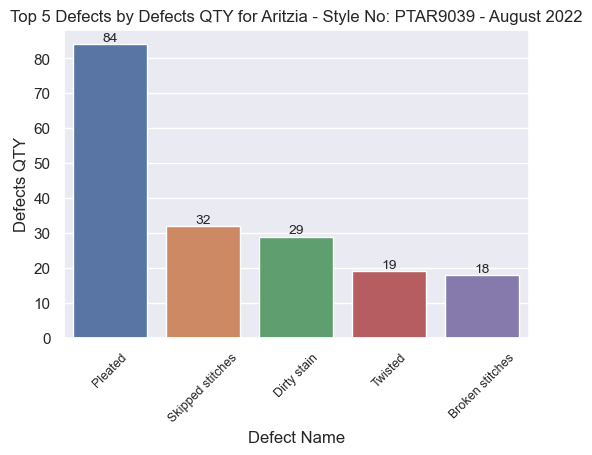

In [84]:
plot_top_defects('Aritzia','PTAR9009','August 2022')
plot_top_defects('Aritzia','PTAR9103','August 2022')
plot_top_defects('Aritzia','PTAR9076','August 2022')
plot_top_defects('Aritzia','PTAR9113','August 2022')
plot_top_defects('Aritzia','PTAR8716','August 2022')
plot_top_defects('Aritzia','PTAR9039','August 2022')

It seems that two Style Nos (PTAR9103 and PTAR9113) experienced oil stain issues, and PTAR9009 had Hole/Needle Hole issues, which led to higher defect rates for the Aritzia Buyer. Therefore, it is recommended to continuously monitor these issues to prevent high defect rates. One hypothesis is that Artizia buyers complained (CAP) about the same issues, which occurred in August for Aritzia Style. It is clear that the QC department needs to pay more attention, especially to Aritzia Style, as it continuously records higher defect rates

Let's check the situation of September and December Month for Artizia Style.

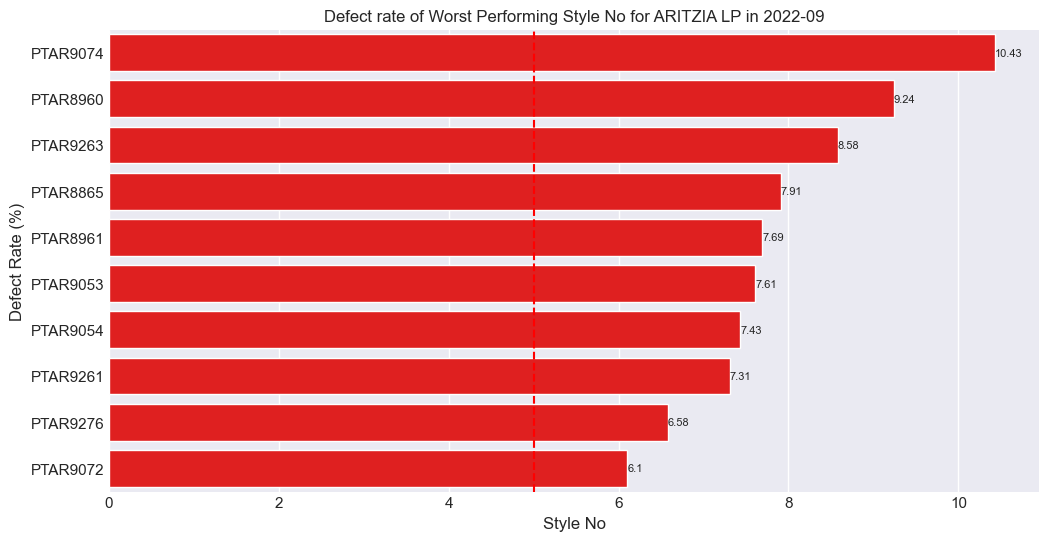

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
9,2022-09,PTAR9074,1,834,87,10.43
1,2022-09,PTAR8960,3,1536,142,9.24
25,2022-09,PTAR9263,3,3030,260,8.58
0,2022-09,PTAR8865,3,1024,81,7.91
2,2022-09,PTAR8961,3,3172,244,7.69
4,2022-09,PTAR9053,3,1590,121,7.61
5,2022-09,PTAR9054,3,2409,179,7.43
23,2022-09,PTAR9261,3,3558,260,7.31
27,2022-09,PTAR9276,5,1840,121,6.58
8,2022-09,PTAR9072,9,5248,320,6.10


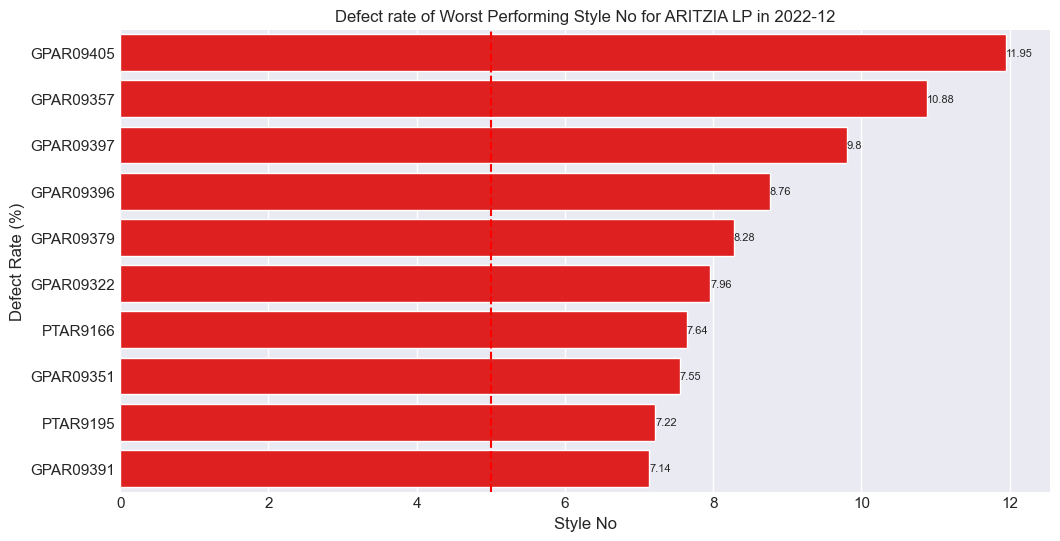

,Year-Month,Style No,Sewing Line No,Output QTY,Defects QTY,Defect rate
20,2022-12,GPAR09405,3,1004,120,11.95
4,2022-12,GPAR09357,8,901,98,10.88
18,2022-12,GPAR09397,8,3143,308,9.80
17,2022-12,GPAR09396,8,3904,342,8.76
13,2022-12,GPAR09379,9,857,71,8.28
0,2022-12,GPAR09322,3,5412,431,7.96
26,2022-12,PTAR9166,3,2028,155,7.64
3,2022-12,GPAR09351,8,2861,216,7.55
28,2022-12,PTAR9195,9,4031,291,7.22
16,2022-12,GPAR09391,8,9264,661,7.14


In [85]:
plot_defect_rate('ARITZIA LP', '2022-09')
display_data('ARITZIA LP', '2022-09')

plot_defect_rate('ARITZIA LP', '2022-12')
display_data('ARITZIA LP', '2022-12')

Although the Style Nos that had oil stain and Hole/Needle Hole issues were not present in the Top 10 worst performing styles for September month, it is still evident that many Aritzia Styles are experiencing high defect rates. 

Specifically, the Style Nos that start with 'GPAR' are among the most recent styles and are exhibiting very high defect rates. Due to the large scope of this analysis, I will only focus on two Style Nos with high Output QTY, 'GPAR09322' and 'GPAR09391', to determine the root cause of their high defect rates in December month.

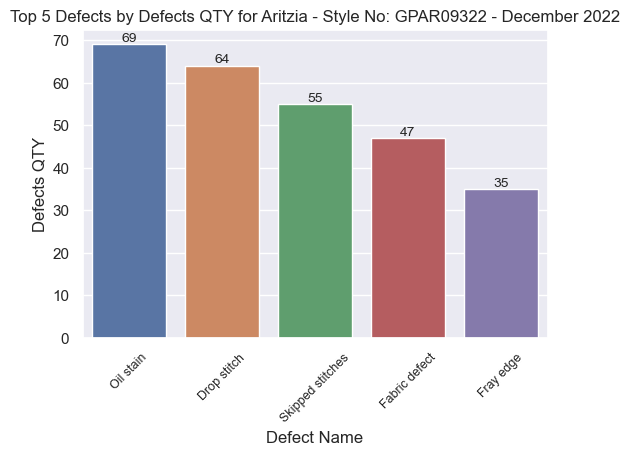

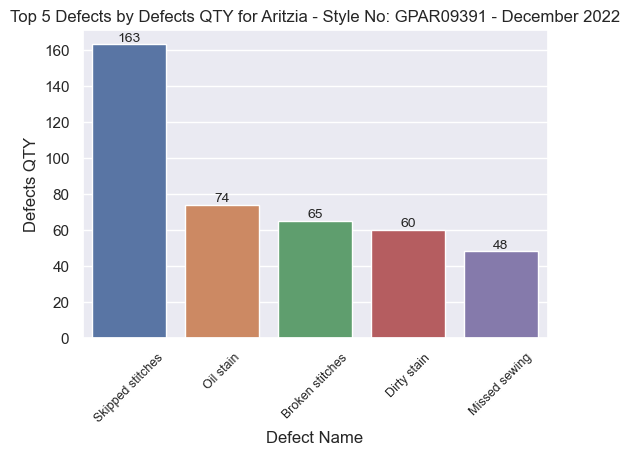

In [86]:
plot_top_defects('Aritzia','GPAR09322','December 2022')
plot_top_defects('Aritzia','GPAR09391','December 2022')

Based on the previous analysis, it is evident that the issue of oil stain still persists in Aritzia Style No, which is a serious concern for the future. Immediate action is required to address this issue and prevent any complaints from the buyers. It is essential to ensure that proper quality control measures are in place and that the production process is monitored closely to prevent any further occurrences of this issue. Failure to do so may result in a negative impact on the reputation of the company and may lead to a loss of business. Therefore, it is recommended to take proactive steps to address this issue and ensure that the production process is optimized to prevent any defects or quality issues in the future.

<a id="2.5"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">2.5 QC1 Worker Efficiency Analysis </div>

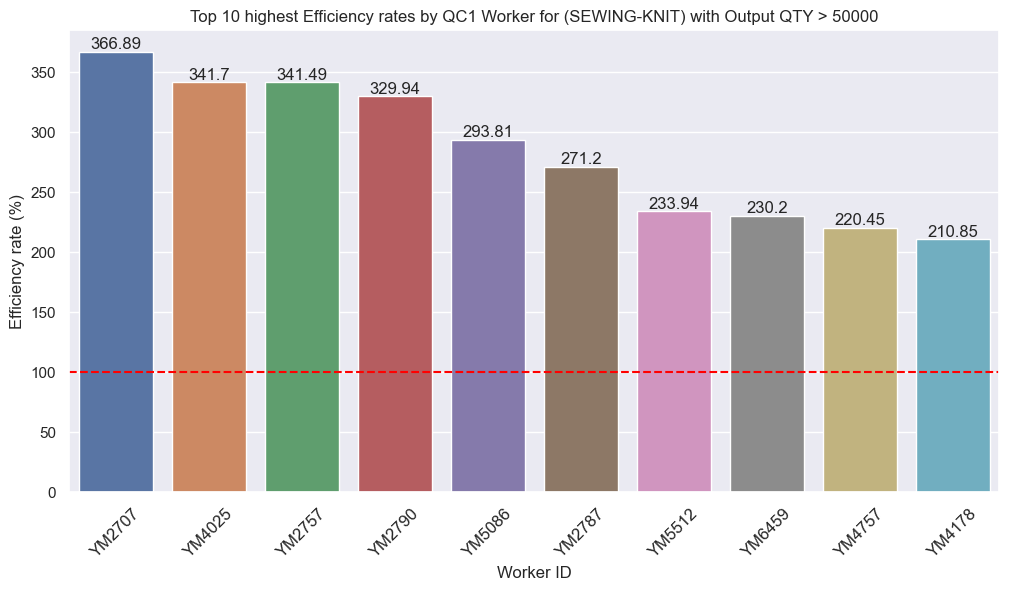

In [87]:
# Group the data by Buyer Name and Department and calculate the sum of Defects QTY and Output QTY for each group
grouped_data = raw_data.groupby(['QC1 ID', 'Department'])[['Total SAM', 'Working Mins', 'Output QTY']].sum().reset_index()

# Calculate the Efficiency rate by dividing Total SAM by Working Mins and multiplying by 100
grouped_data['Efficiency rate'] = grouped_data['Total SAM'] / grouped_data['Working Mins'] * 100
grouped_data['Efficiency rate'] = grouped_data['Efficiency rate'].apply(lambda x: round(x, 2))

# Filter the data for the SEWING-KNIT department
sewing_knit_data = grouped_data[grouped_data['Department'] == 'SEWING-KNIT']

# Filter the data for Output QTY > 10000 and Working Mins < 1000
sewing_knit_data = sewing_knit_data[(sewing_knit_data['Output QTY'] > 50000) & (sewing_knit_data['Working Mins'] > 1000)]

# Sort by Efficiency rate in descending order
sewing_knit_data = sewing_knit_data.sort_values(by='Efficiency rate', ascending=False).head(10)


# Select the top 10 highest Efficiency rate by QC1 ID
top_10_efficiency = sewing_knit_data.groupby('QC1 ID').apply(lambda x: x.nlargest(10, 'Efficiency rate')).reset_index(drop=True)

# Set the plot style
sns.set(style="darkgrid")

# Create a bar plot for the Efficiency rate by QC1 ID
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_efficiency['QC1 ID'], y=top_10_efficiency['Efficiency rate'], data=top_10_efficiency)

# Add data labels for the Efficiency rate
for i, bar in enumerate(ax.containers):
    rate = top_10_efficiency.loc[top_10_efficiency.index[i], 'Efficiency rate']
    ax.bar_label(bar, label=f"{rate:.2f}%", label_type='edge', fontsize=12)

# Rotate the tick labels and reduce font size
plt.xticks(rotation=45, fontsize=12)

# Add a horizontal line at Efficiency rate = 100%
plt.axhline(100, color='red', linestyle='--')

# Add plot labels
plt.title('Top 10 highest Efficiency rates by QC1 Worker for (SEWING-KNIT) with Output QTY > 50000')
plt.xlabel('Worker ID')
plt.ylabel('Efficiency rate (%)')

plt.show()

It is clear that QC1 workers has better Efficiency rate that's mean it improve the production speed, However, it is essential to monitor their performance closely by Line leaders, QC supervisors, and managers to maintain lower defect rates and ensure that quality is not compromised in the process.

# 3. Predict the Defect rates using Machine Learning Approach

In [88]:
# Group the data by the specified columns
final_data = raw_data.groupby(['Date', 
                                    'Sewing Line No', 
                                    'Buyer Name', 
                                    'Department']).agg({
    'Output QTY': 'sum',
    'Defects QTY': 'sum',
    'Total SAM': 'sum',
    'Working Mins': 'sum',
    
}).reset_index()

final_data.head()

,Date,Sewing Line No,Buyer Name,Department,Output QTY,Defects QTY,Total SAM,Working Mins
0,2022-08-01,1,ARITZIA LP,SEWING-KNIT,673,88,0.00,1289.58
1,2022-08-01,10,REITMANS (CANADA) LIMITED,SEWING-KNIT,668,71,26.68,861.86
2,2022-08-01,11,ARITZIA LP,SEWING-KNIT,404,24,845.70,1149.22
3,2022-08-01,12,C&O APPAREL INC.,SEWING-KNIT,1575,108,2252.48,1299.87
4,2022-08-01,13,ARITZIA LP,SEWING-KNIT,650,35,1365.00,1264.50


In [89]:
# Create the 'Defect rate' column with zero-divergent error handling
final_data['Defect rate'] = final_data.apply(lambda row: row['Defects QTY'] / 
                                             row['Output QTY'] if row['Output QTY'] != 0 else 0, axis=1)

final_data = final_data[(final_data['Total SAM'] != 0) & (final_data['Working Mins'] != 0)]

final_data.head()

,Date,Sewing Line No,Buyer Name,Department,Output QTY,Defects QTY,Total SAM,Working Mins,Defect rate
1,2022-08-01,10,REITMANS (CANADA) LIMITED,SEWING-KNIT,668,71,26.68,861.86,0.106287
2,2022-08-01,11,ARITZIA LP,SEWING-KNIT,404,24,845.70,1149.22,0.059406
3,2022-08-01,12,C&O APPAREL INC.,SEWING-KNIT,1575,108,2252.48,1299.87,0.068571
4,2022-08-01,13,ARITZIA LP,SEWING-KNIT,650,35,1365.00,1264.50,0.053846
5,2022-08-01,14,REITMANS (CANADA) LIMITED,SEWING-KNIT,1107,38,2322.90,1057.30,0.034327


In [90]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 1 to 3601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3547 non-null   datetime64[ns]
 1   Sewing Line No  3547 non-null   object        
 2   Buyer Name      3547 non-null   object        
 3   Department      3547 non-null   object        
 4   Output QTY      3547 non-null   int32         
 5   Defects QTY     3547 non-null   int32         
 6   Total SAM       3547 non-null   float64       
 7   Working Mins    3547 non-null   float64       
 8   Defect rate     3547 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(3)
memory usage: 249.4+ KB


### Converitng Categorical variables into Numerical variables

In [91]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

final_data['Sewing Line No'] = label_encoder.fit_transform(final_data['Sewing Line No'])
final_data['Buyer Name'] = label_encoder.fit_transform(final_data['Buyer Name'])
final_data['Department'] = label_encoder.fit_transform(final_data['Department'])

In [92]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3547 entries, 1 to 3601
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3547 non-null   datetime64[ns]
 1   Sewing Line No  3547 non-null   int32         
 2   Buyer Name      3547 non-null   int32         
 3   Department      3547 non-null   int32         
 4   Output QTY      3547 non-null   int32         
 5   Defects QTY     3547 non-null   int32         
 6   Total SAM       3547 non-null   float64       
 7   Working Mins    3547 non-null   float64       
 8   Defect rate     3547 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(5)
memory usage: 207.8 KB


In [93]:
final_data.head()

,Date,Sewing Line No,Buyer Name,Department,Output QTY,Defects QTY,Total SAM,Working Mins,Defect rate
1,2022-08-01,1,5,1,668,71,26.68,861.86,0.106287
2,2022-08-01,2,1,1,404,24,845.70,1149.22,0.059406
3,2022-08-01,3,2,1,1575,108,2252.48,1299.87,0.068571
4,2022-08-01,4,1,1,650,35,1365.00,1264.50,0.053846
5,2022-08-01,5,5,1,1107,38,2322.90,1057.30,0.034327


<a id="3.1"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">3.1 Linear Regression </div>

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [95]:
#Split the data into features (X) and target (y)
X = final_data[['Buyer Name', 'Sewing Line No', 'Department', 'Output QTY','Defects QTY', 'Total SAM', 'Working Mins']]
y = final_data['Defect rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [96]:
# Choose a machine learning algorithm
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00079
R-squared: 0.50


### Checking Multicolinearity

<AxesSubplot:>

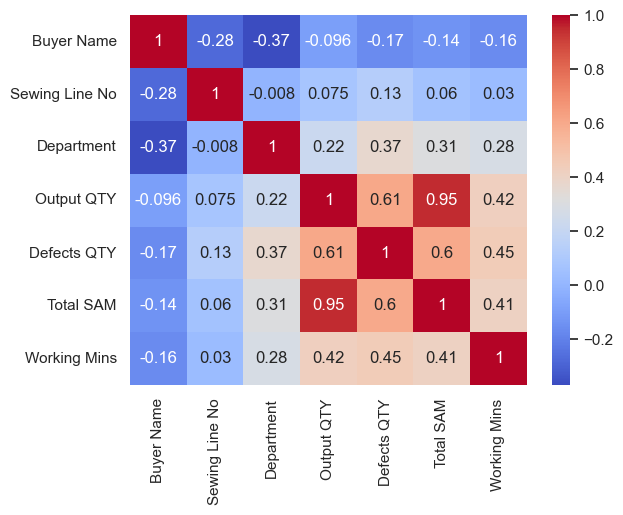

In [97]:
import seaborn as sns

# Create the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


### Removing Multicolinearity by using Principal Component Analysis

In [98]:
# Use PCA to remove multicollinearity
pca = PCA(n_components=5)
X = pca.fit_transform(X)

In [99]:
# Choose a machine learning algorithm
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00079
R-squared: 0.50


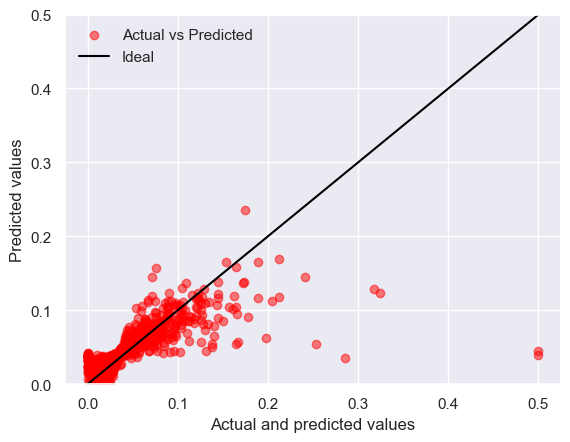

In [100]:
# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='red', alpha=0.5,label='Actual vs Predicted' )

# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Ideal')

# Set the y-axis limits and label
plt.ylim([0, 0.5])
plt.ylabel('Defect rate')

# Set the x-axis label
plt.xlabel('Actual and predicted values')
plt.ylabel('Predicted values')
plt.legend()

# Show the plot
plt.show()

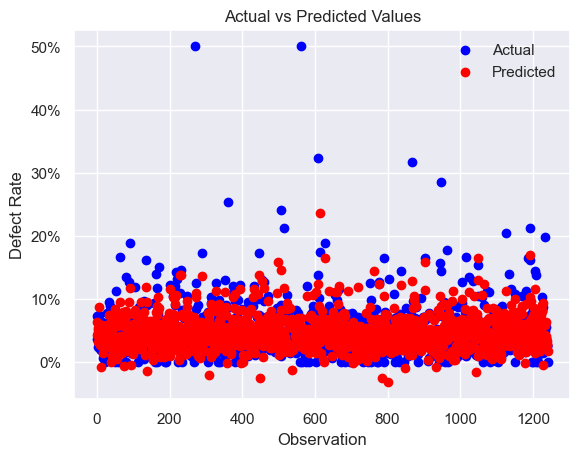

In [101]:
# Define the function to format y-axis values as percentages
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Plot the actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Defect Rate')
plt.legend()

# Format the y-axis as percentages
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<a id="3.2"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">3.2 Decision Tree Algorithm </div>

In [102]:
from sklearn.tree import DecisionTreeRegressor

# Choose a machine learning algorithm
tree_reg = DecisionTreeRegressor()

# Train the model on the training data
tree_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00026
R-squared: 0.83


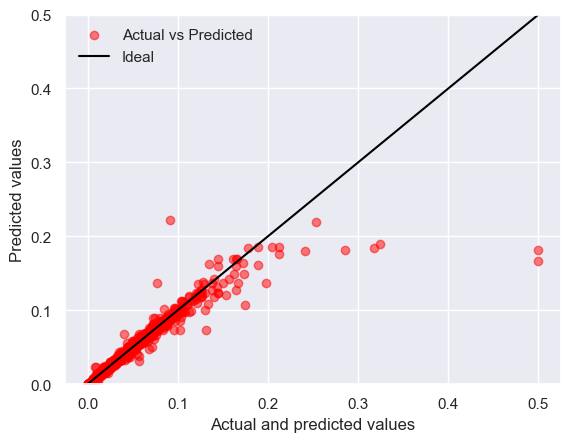

In [103]:
# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='red', alpha=0.5,label='Actual vs Predicted' )

# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Ideal')

# Set the y-axis limits and label
plt.ylim([0, 0.5])
plt.ylabel('Defect rate')

# Set the x-axis label
plt.xlabel('Actual and predicted values')
plt.ylabel('Predicted values')
plt.legend()

# Show the plot
plt.show()

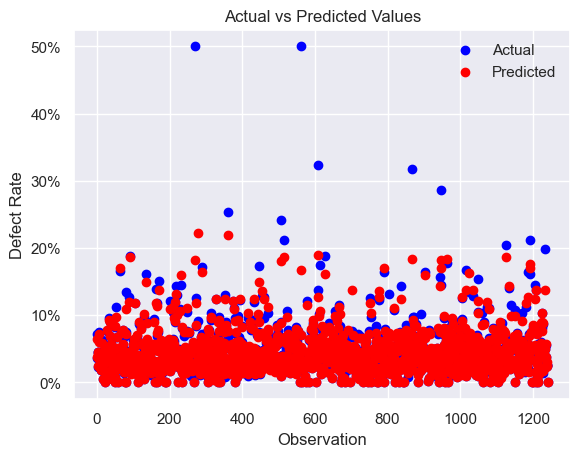

In [104]:
# Define the function to format y-axis values as percentages
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Plot the actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Defect Rate')
plt.legend()

# Format the y-axis as percentages
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<a id="3.3"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">3.3 Random Forest Algorithm </div>

In [105]:
from sklearn.ensemble import RandomForestRegressor

# Choose a machine learning algorithm
rf_reg = RandomForestRegressor()

# Train the model on the training data
rf_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00028
R-squared: 0.83


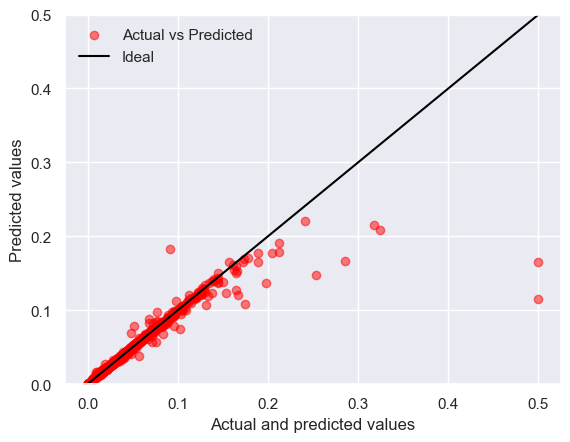

In [106]:
# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='red', alpha=0.5,label='Actual vs Predicted' )

# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Ideal')

# Set the y-axis limits and label
plt.ylim([0, 0.5])
plt.ylabel('Defect rate')

# Set the x-axis label
plt.xlabel('Actual and predicted values')
plt.ylabel('Predicted values')
plt.legend()

# Show the plot
plt.show()

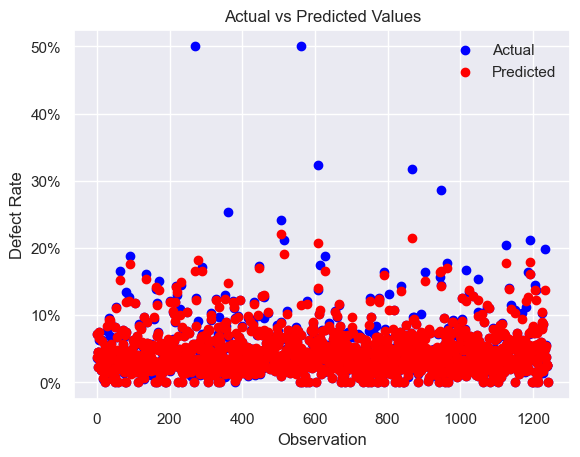

In [107]:
# Define the function to format y-axis values as percentages
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Plot the actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Defect Rate')
plt.legend()

# Format the y-axis as percentages
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<a id="3.4"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">3.4 Gradient Boosting Algorithm </div>

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

# Choose a machine learning algorithm
gb_reg = GradientBoostingRegressor()

# Train the model on the training data
gb_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = gb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00026
R-squared: 0.84


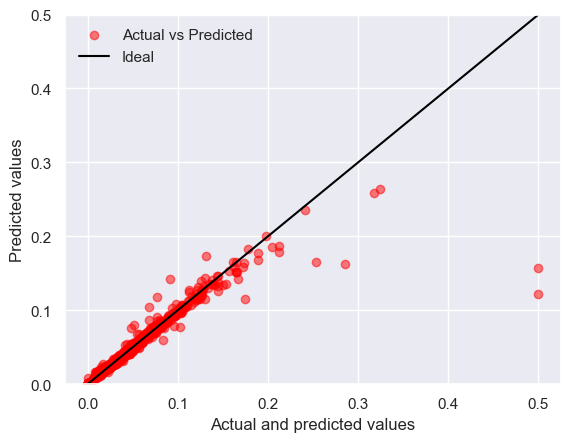

In [109]:
# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='red', alpha=0.5,label='Actual vs Predicted' )

# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Ideal')

# Set the y-axis limits and label
plt.ylim([0, 0.5])
plt.ylabel('Defect rate')

# Set the x-axis label
plt.xlabel('Actual and predicted values')
plt.ylabel('Predicted values')
plt.legend()

# Show the plot
plt.show()

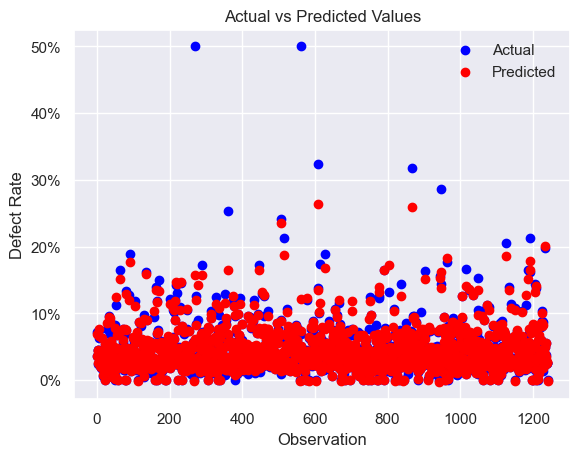

In [110]:
# Define the function to format y-axis values as percentages
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Plot the actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Defect Rate')
plt.legend()

# Format the y-axis as percentages
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<a id="3.5"></a>
<div style="color: blue; font-size: 1.5em; font-weight: bold;">3.5 XG Boost Algorithm </div>

In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from xgboost import XGBRegressor

# Choose a machine learning algorithm
xgb_reg = XGBRegressor()

# Train the model on the training data
xgb_reg.fit(X_train, y_train)

# Evaluate the performance of the model on the testing data
y_pred = xgb_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.5f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 0.00025
R-squared: 0.84


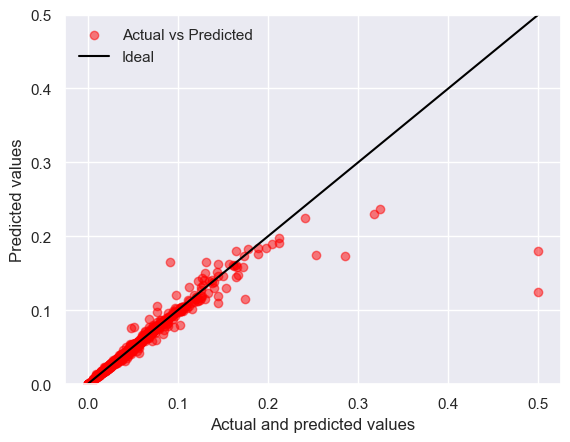

In [113]:
# Plot the actual and predicted values
plt.scatter(y_test, y_pred, color='red', alpha=0.5,label='Actual vs Predicted' )

# Plot a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Ideal')

# Set the y-axis limits and label
plt.ylim([0, 0.5])
plt.ylabel('Defect rate')

# Set the x-axis label
plt.xlabel('Actual and predicted values')
plt.ylabel('Predicted values')
plt.legend()

# Show the plot
plt.show()

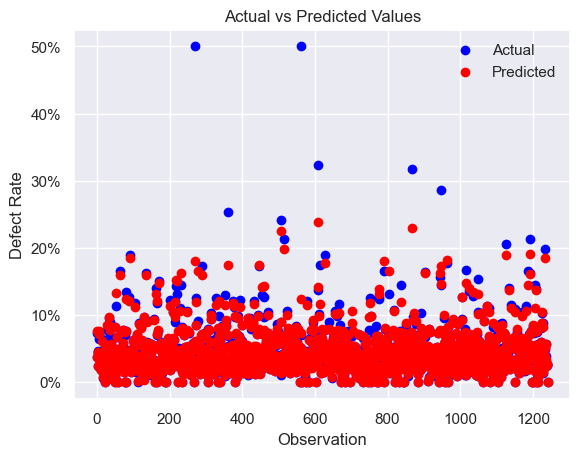

In [114]:
# Define the function to format y-axis values as percentages
def to_percent(y, position):
    return f'{y*100:.0f}%'

# Plot the actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

plt.title('Actual vs Predicted Values')
plt.xlabel('Observation')
plt.ylabel('Defect Rate')
plt.legend()

# Format the y-axis as percentages
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

It seems that Mutiple Linear Regression model is not suitable to predict the Defect rate. Decision Tree, Random Forest, Gradient Boosting, and XG Boost Algortihm performed well and received lower Mean Squared Error and High R-Square value which is greater than 0.8

It seems that all models except for linear regression have a better performance in predicting the defect rate based on the actual versus predicted values graph. The deviation of the predicted values from the ideal reference line is less in these models. Additionally, we can observe that there are some instances in the dataset with extremely high defect rates which can result in lower output quantity. Therefore, it is important to identify and remove these outliers from the datasets